<a href="https://colab.research.google.com/github/RuthBiney/Capstone-BCI/blob/main/Capstone__BCIipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1.1: Load and Parse Video URLs
*   Read the CSV file to extract video links.
*   Download a sample video for processing.

#Read CSV and Download a Video


In [1]:
import pandas as pd
import requests
import os
from IPython.display import display, HTML

# Load dataset
dataset_path = "/content/refined_2M_all_video_url.csv"
try:
    df = pd.read_csv(dataset_path)
    print("Dataset loaded successfully!")
    print("First few rows of the dataset:")
    print(df.head())
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Extract first video URL
try:
    video_url = df.iloc[0, 0]  # Assuming the URLs are in the first column
    print("First video URL extracted:", video_url)
except Exception as e:
    print(f"Error extracting video URL: {e}")
    exit()

# Function to download a video
def download_video(url, save_path="video.mp4"):
    """
    Downloads a video from the given URL and saves it to the specified path.

    Args:
        url (str): The URL of the video to download.
        save_path (str): The path to save the downloaded video. Defaults to "video.mp4".
    """
    try:
        print(f"Downloading video from: {url}")
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an error for bad status codes (e.g., 404, 500)

        # Save the video to the specified path
        with open(save_path, "wb") as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
        print(f"Download complete! Video saved to: {save_path}")
        return save_path

    except requests.exceptions.RequestException as e:
        print(f"Failed to download video: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

# Download a sample video
output_video_path = "sample_video.mp4"  # Customize the output path if needed
video_file = download_video(video_url, output_video_path)

# Verify the video file
if video_file and os.path.exists(video_file):
    print(f"Video file exists at: {video_file}")
    print(f"File size: {os.path.getsize(video_file)} bytes")

    # Display the video in Colab
    print("Displaying the downloaded video...")
    display(HTML(f"""
    <video width="640" height="480" controls>
        <source src="{video_file}" type="video/mp4">
        Your browser does not support the video tag.
    </video>
    """))
else:
    print("Video download failed. Please check the URL or your internet connection.")

Dataset loaded successfully!
First few rows of the dataset:
  https://aistdancedb.ongaaccel.jp/v1.0.0/video/2M/gBR_sBM_c01_d04_mBR0_ch01.mp4
0  https://aistdancedb.ongaaccel.jp/v1.0.0/video/...                            
1  https://aistdancedb.ongaaccel.jp/v1.0.0/video/...                            
2  https://aistdancedb.ongaaccel.jp/v1.0.0/video/...                            
3  https://aistdancedb.ongaaccel.jp/v1.0.0/video/...                            
4  https://aistdancedb.ongaaccel.jp/v1.0.0/video/...                            
First video URL extracted: https://aistdancedb.ongaaccel.jp/v1.0.0/video/2M/gBR_sBM_c01_d04_mBR0_ch02.mp4
Download complete! Video saved to: sample_video.mp4
Video file exists at: sample_video.mp4
File size: 3308958 bytes
Displaying the downloaded video...


#Step 1.2: Extract Frames from Video
*   Load the downloaded video (video.mp4).
*   Extract frames at a fixed interval (e.g., every 5 frames).
*   Save the frames as images for further processing.

#Extract and Save Frames

Upload your video file (e.g., video.mp4):


Saving video.mp4 to video.mp4
Uploaded file: video.mp4
Video Properties: 719 frames, 59.94 FPS, 12.00 seconds
Extracting 1 frame every 7 frames to get 100 frames.
Displaying 1 frame every 8 extracted frames to show 12 frames.
Displaying Frame 8


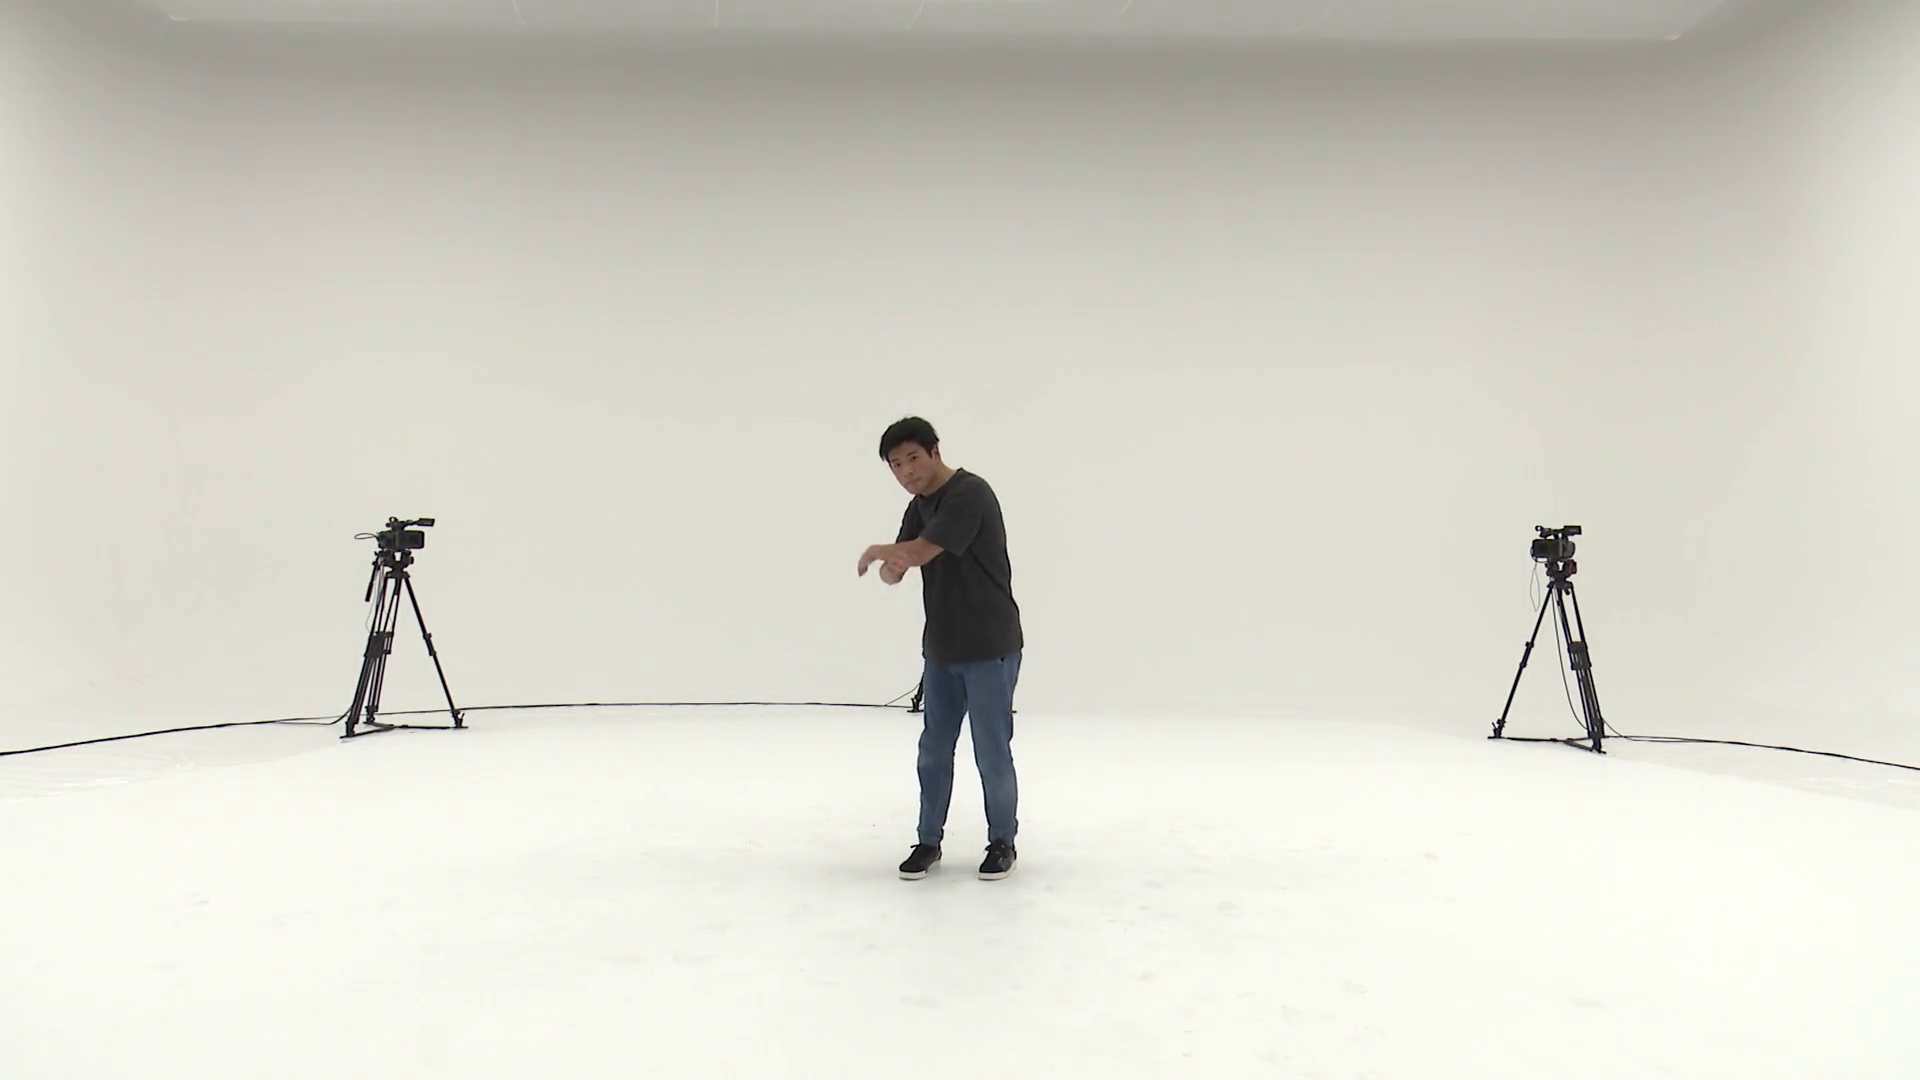

Displaying Frame 16


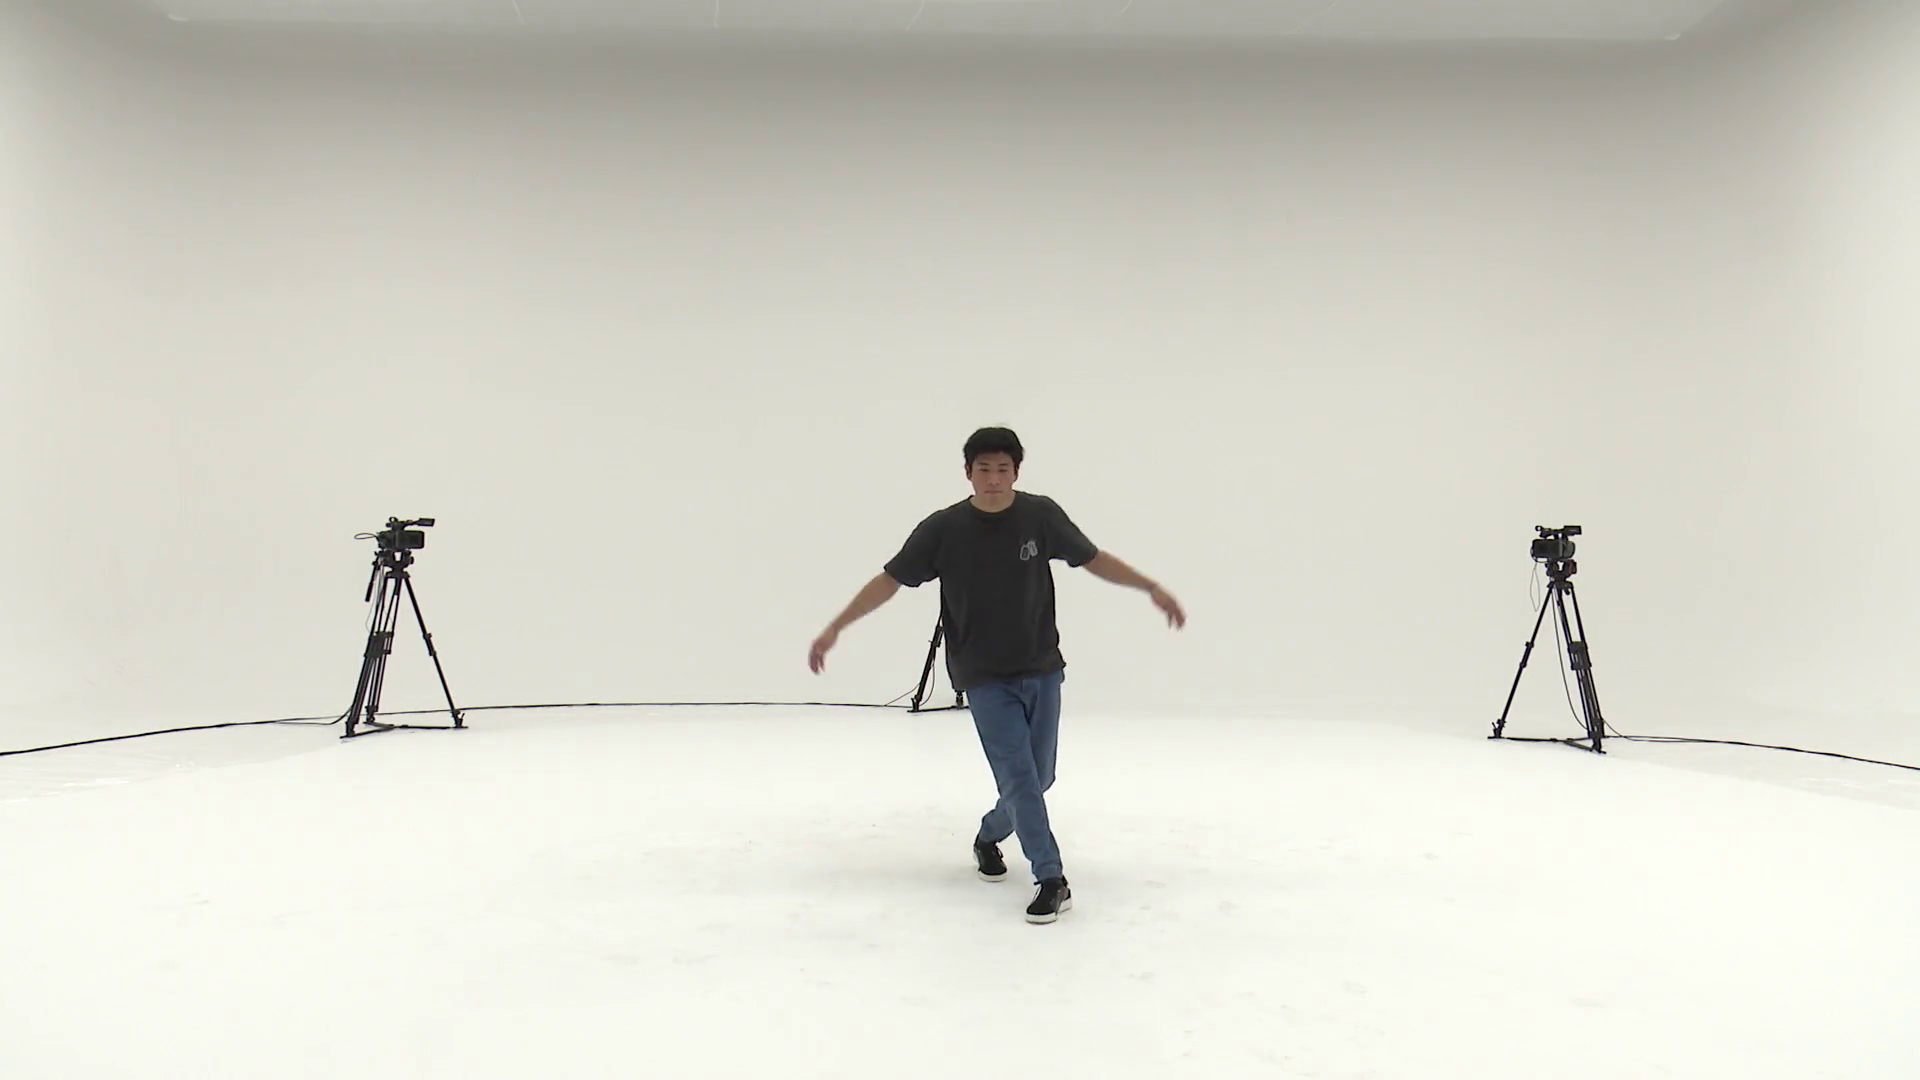

Displaying Frame 24


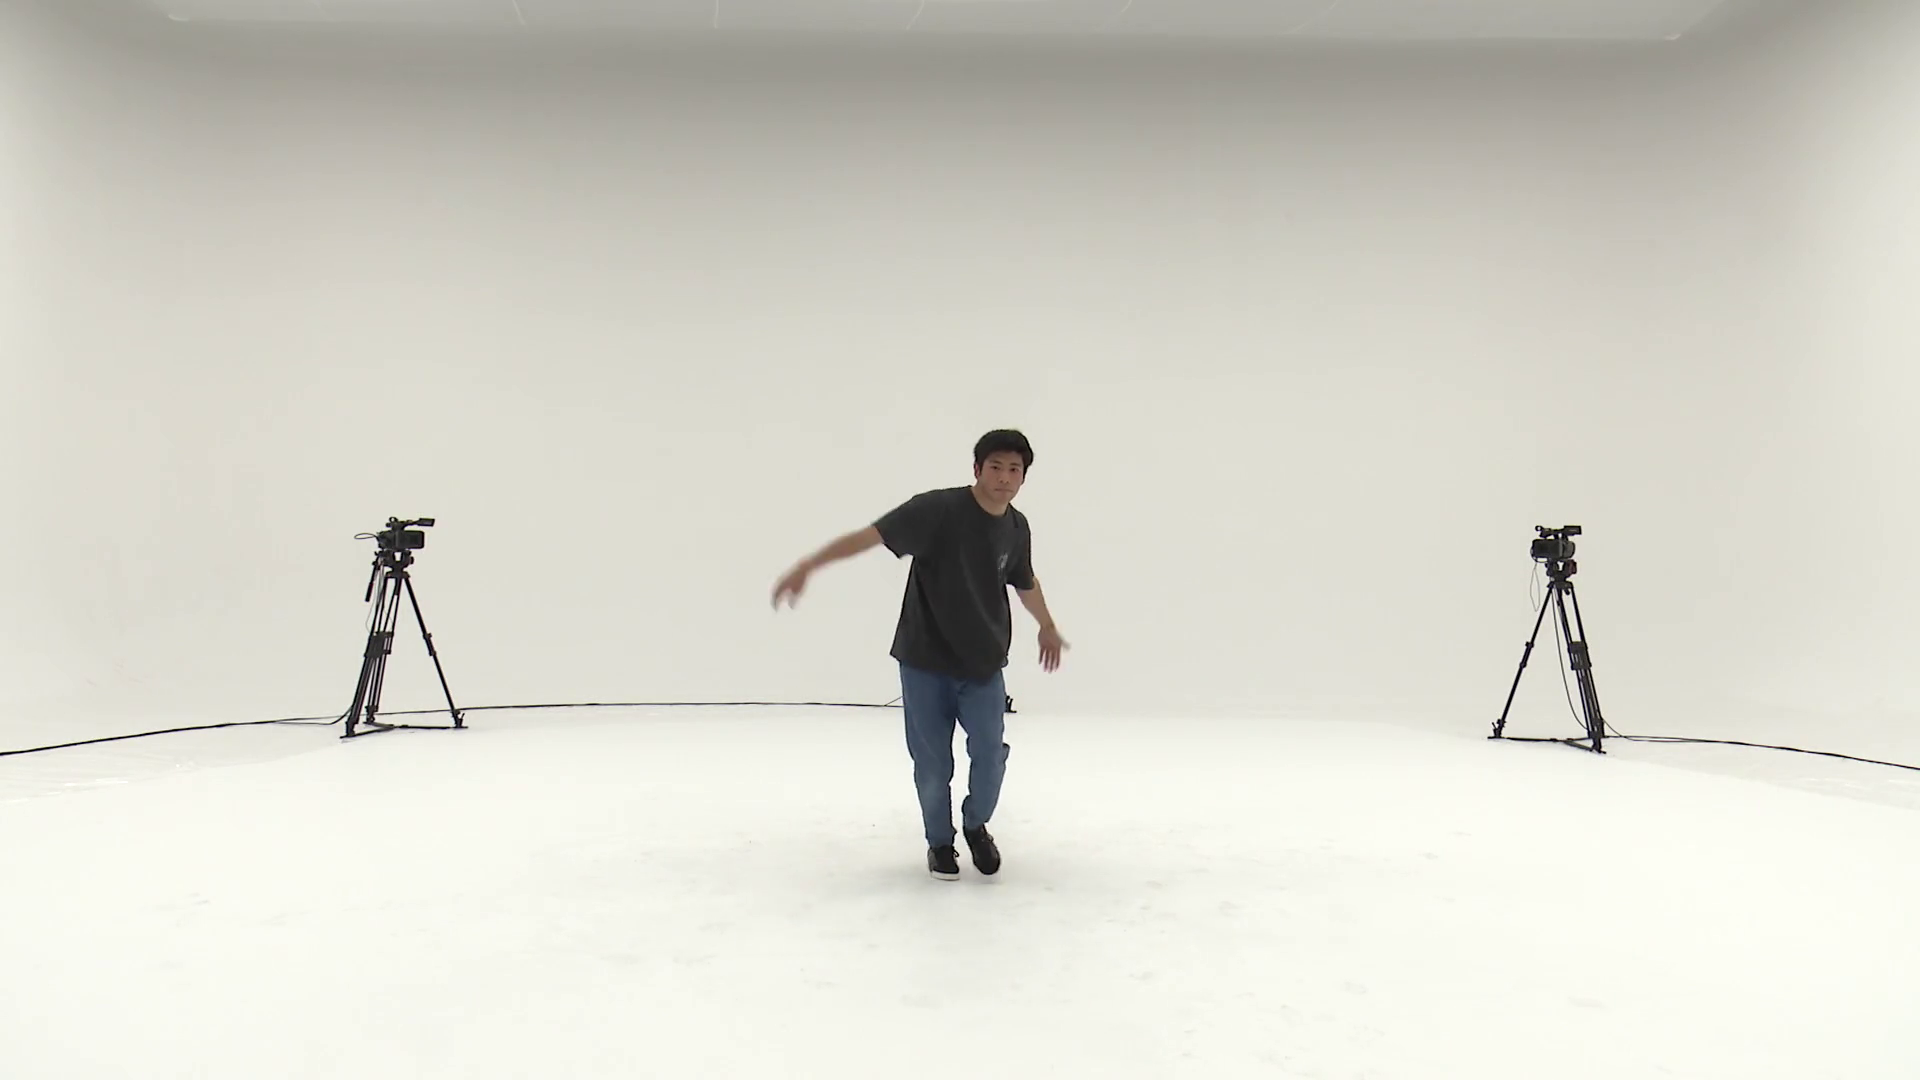

Displaying Frame 32


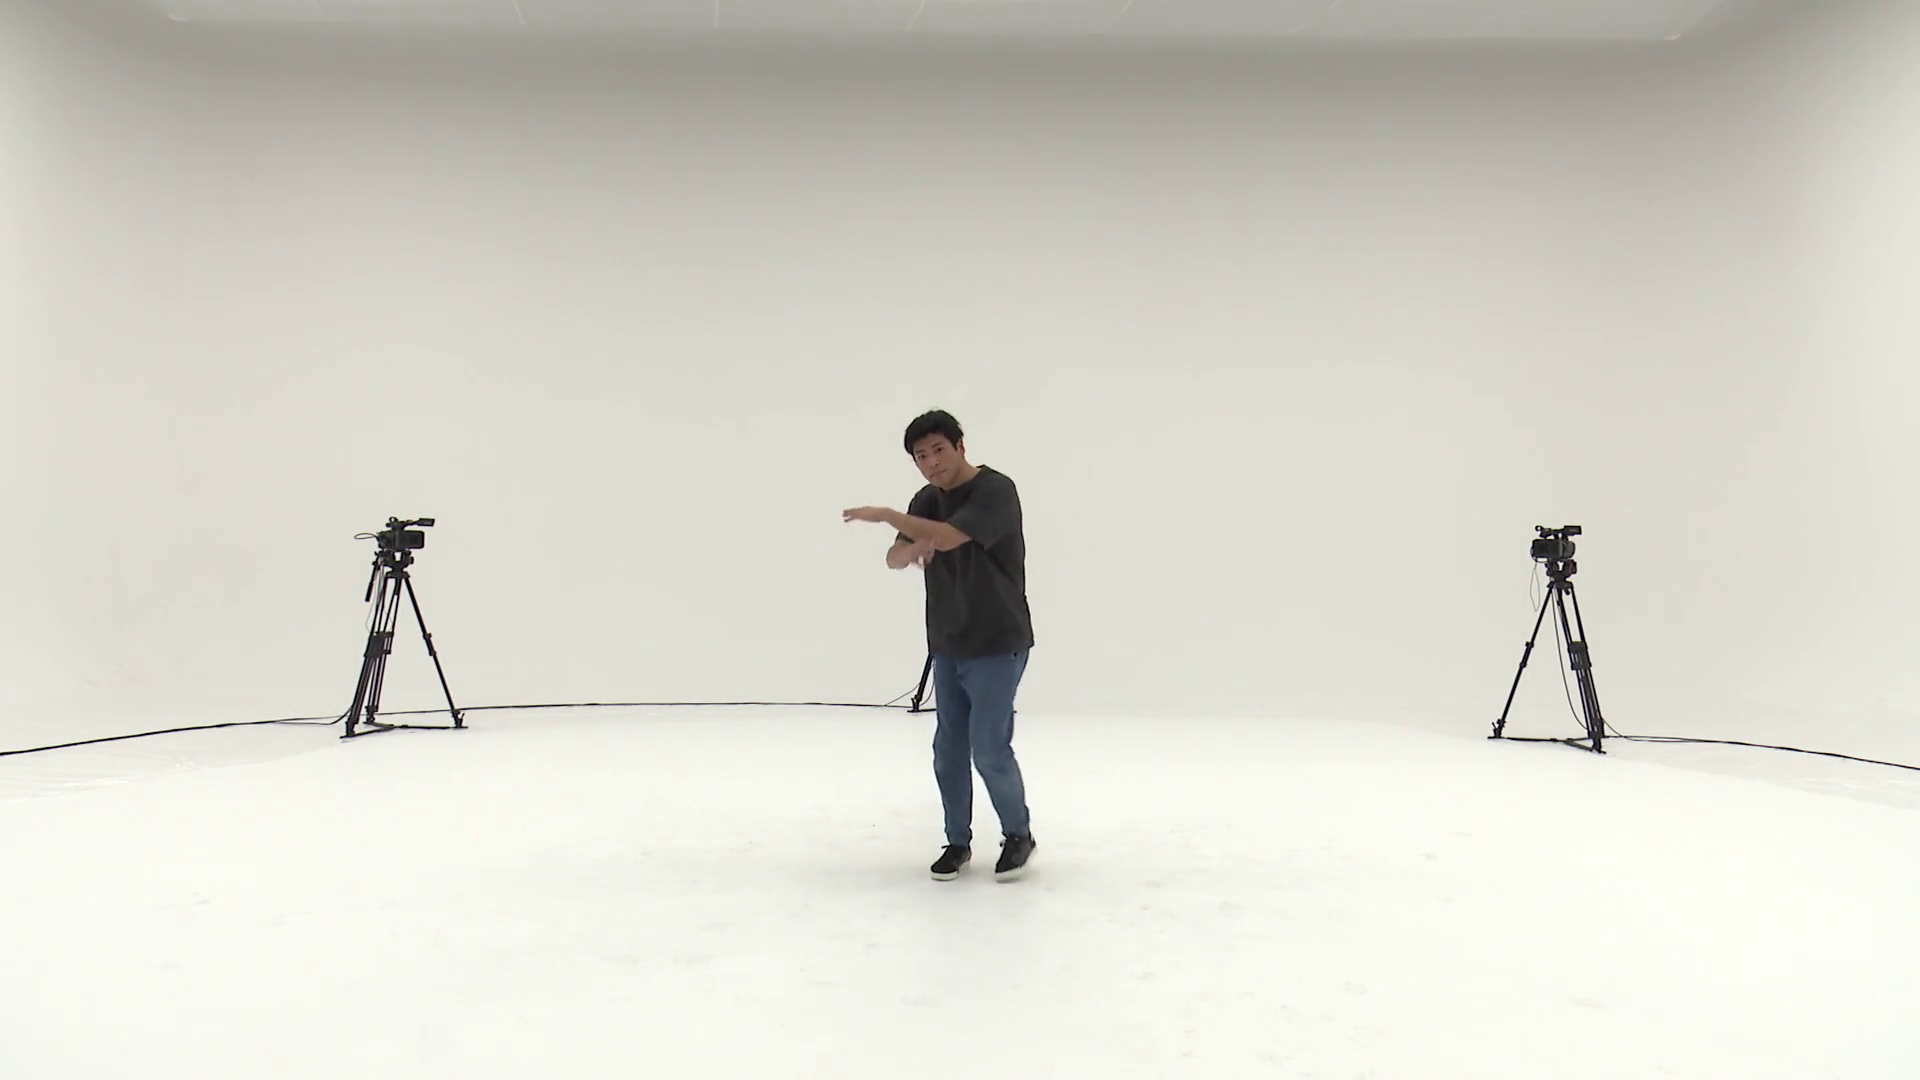

Displaying Frame 40


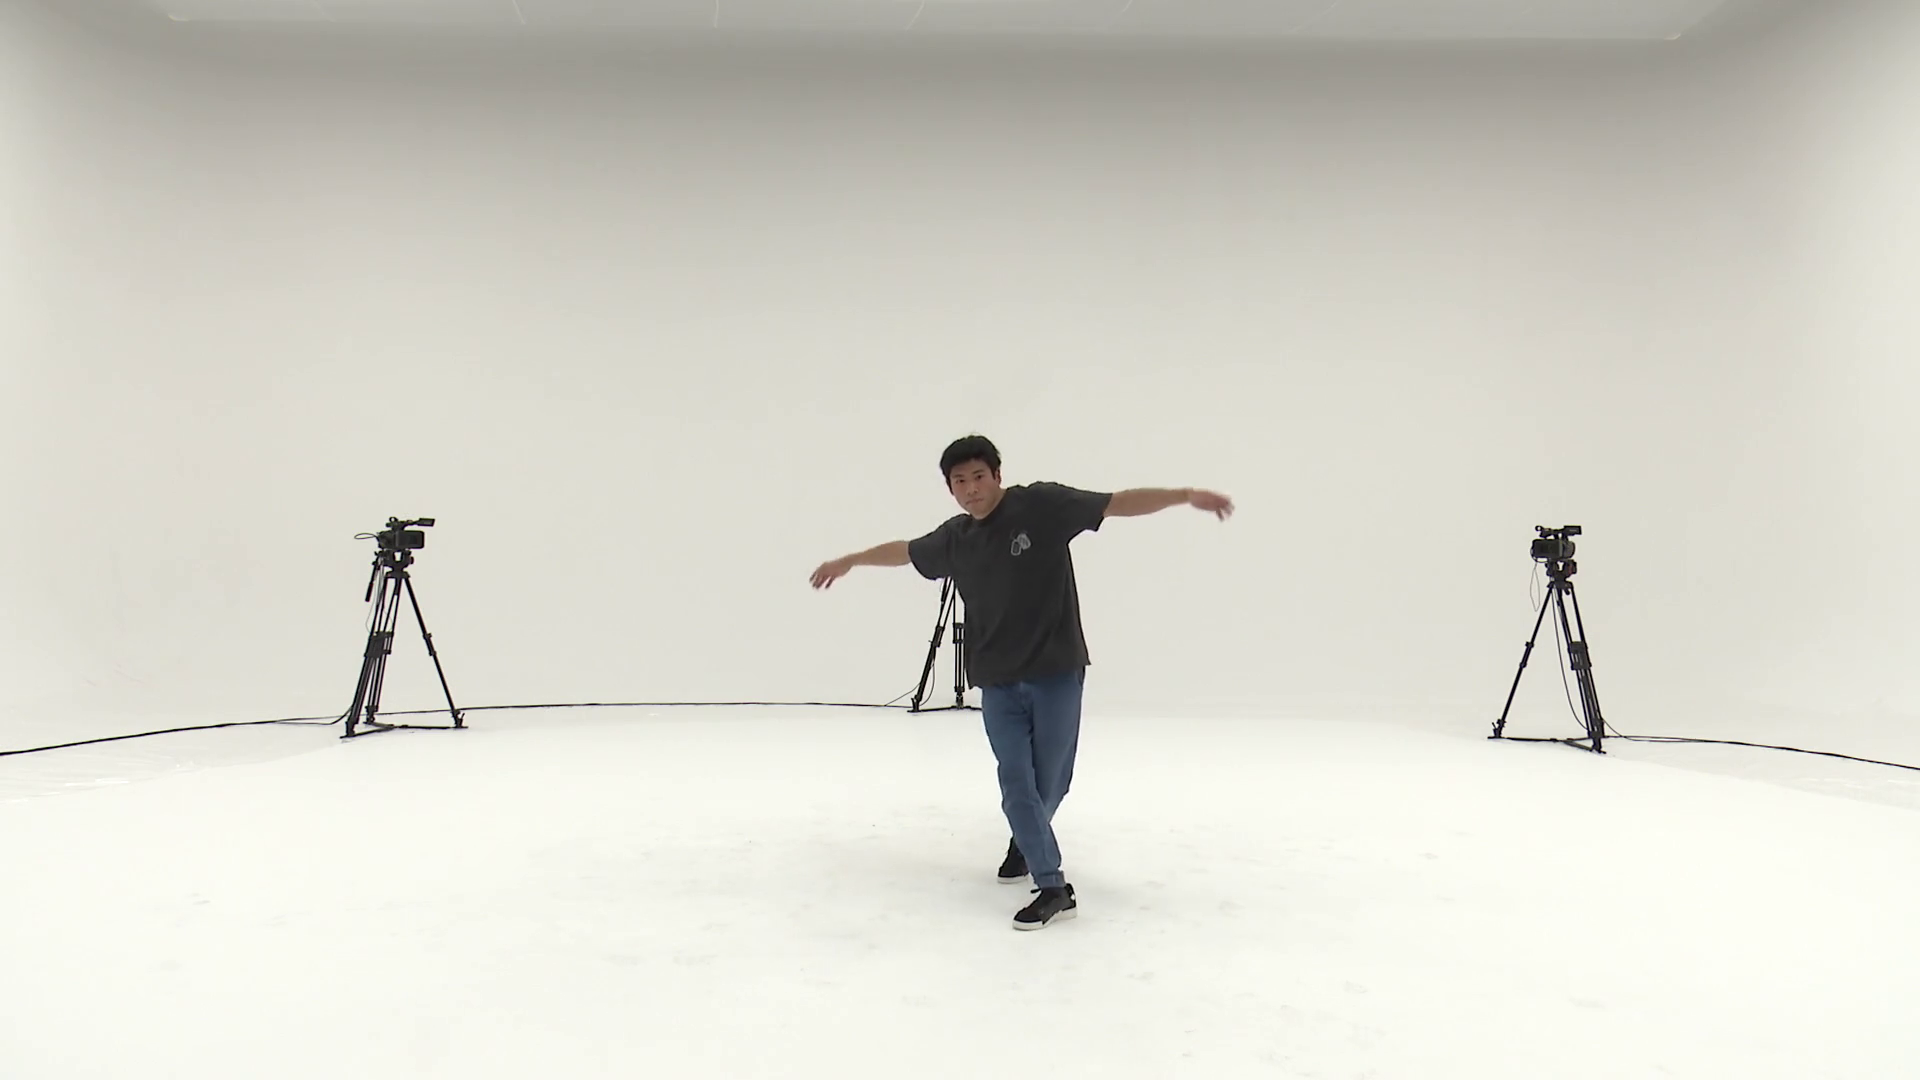

Displaying Frame 48


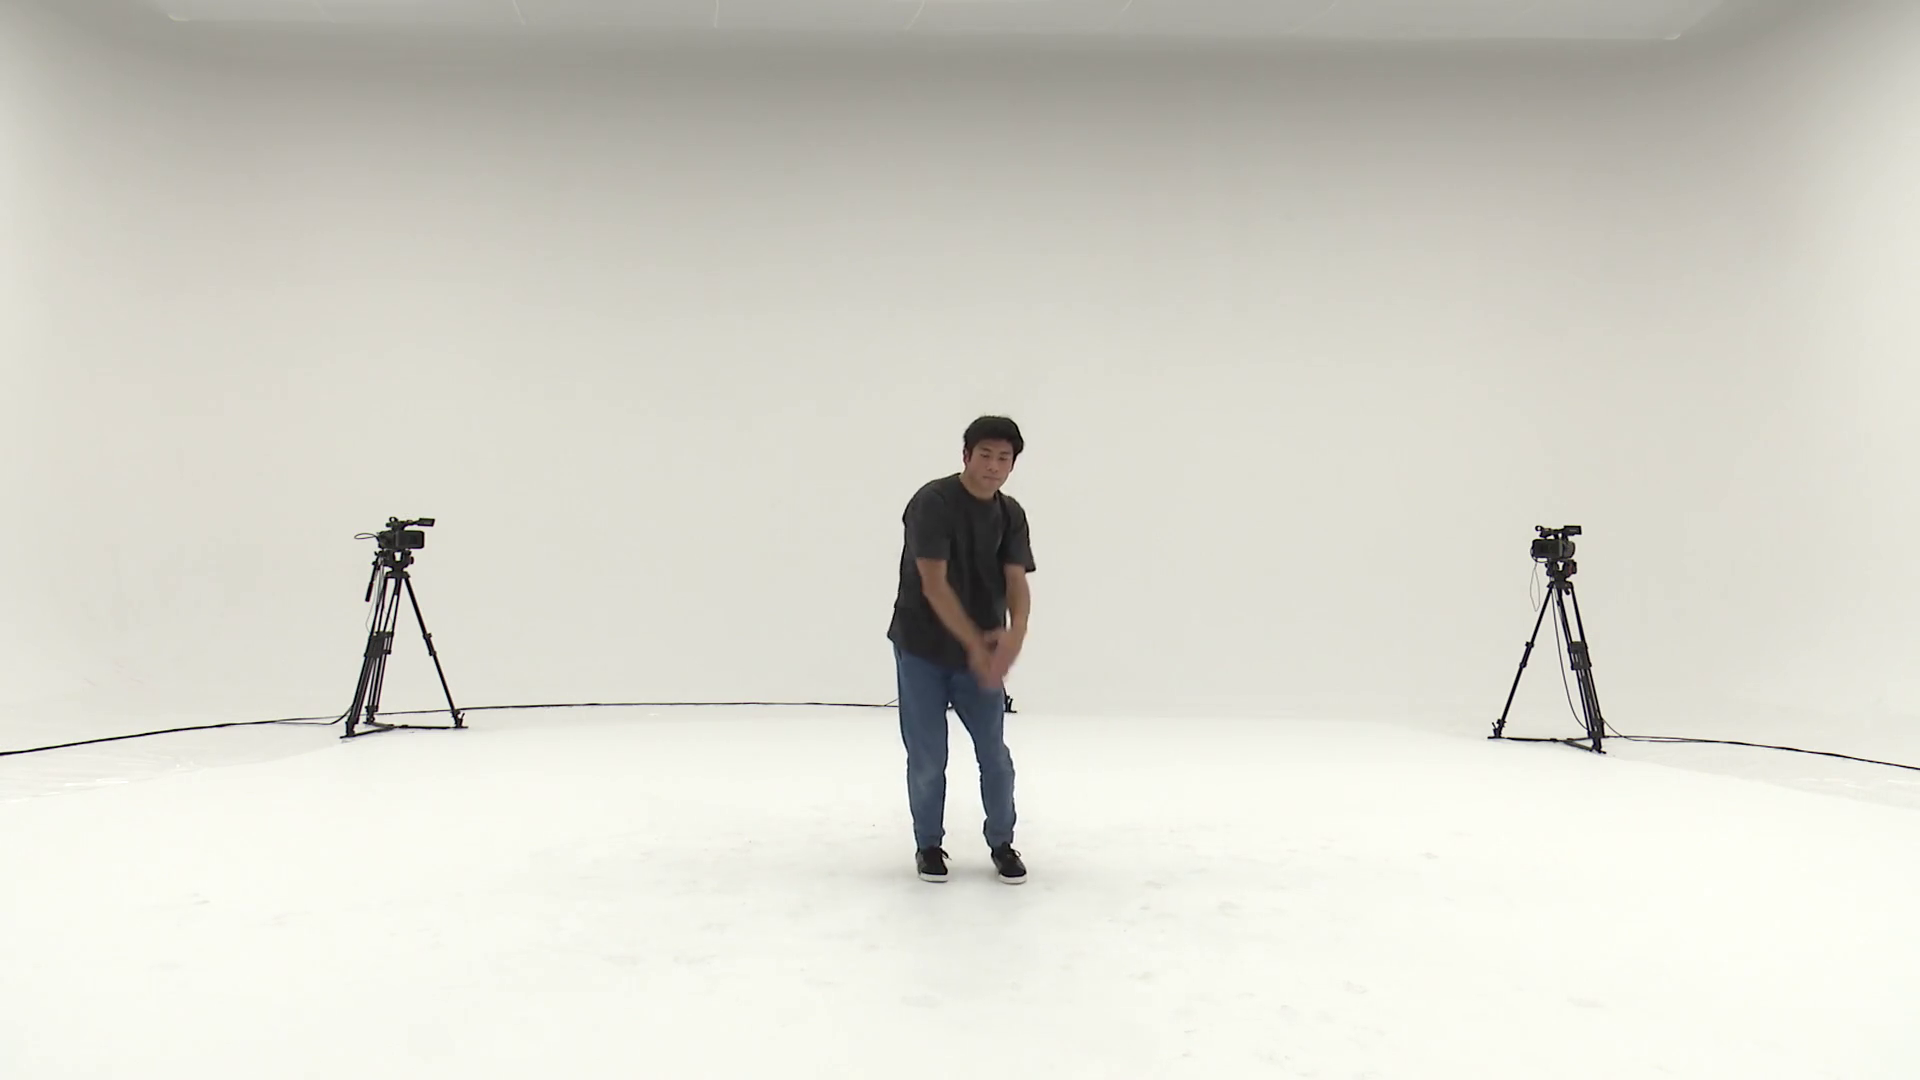

Displaying Frame 56


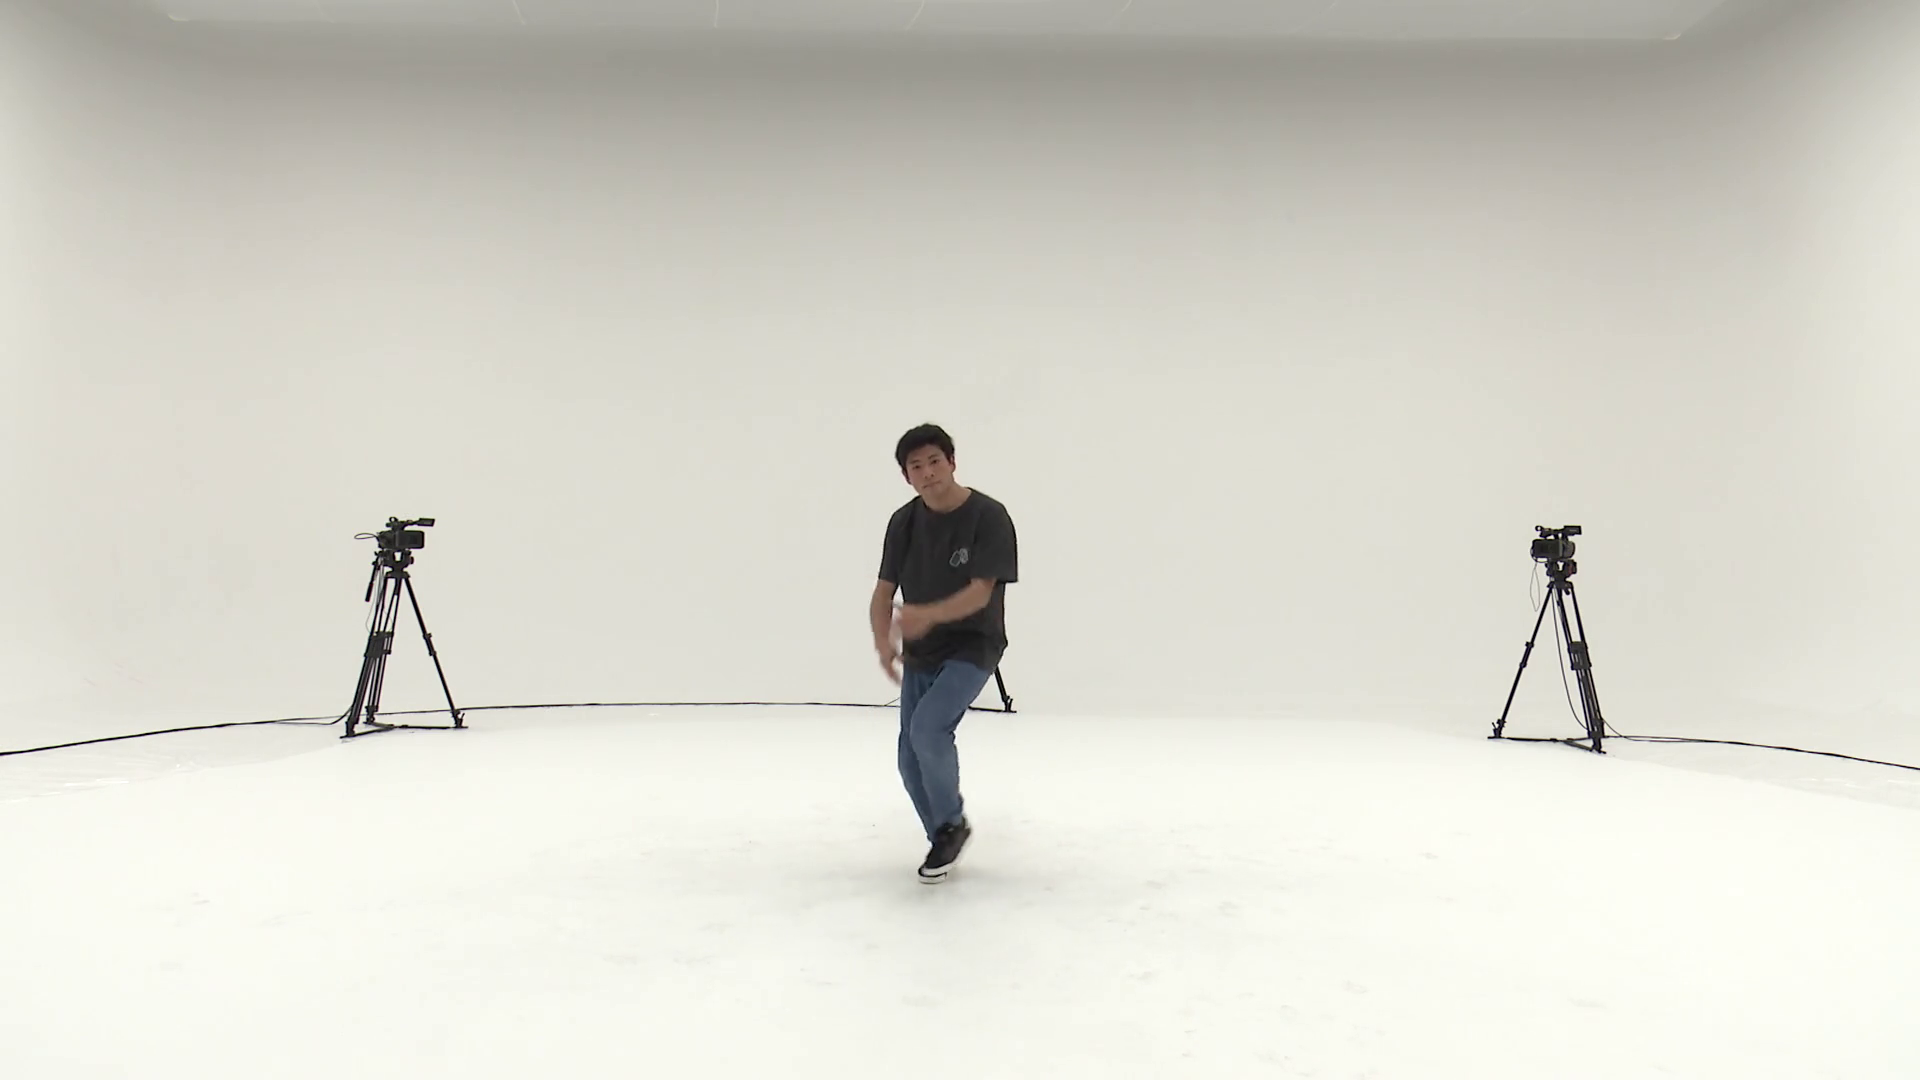

Displaying Frame 64


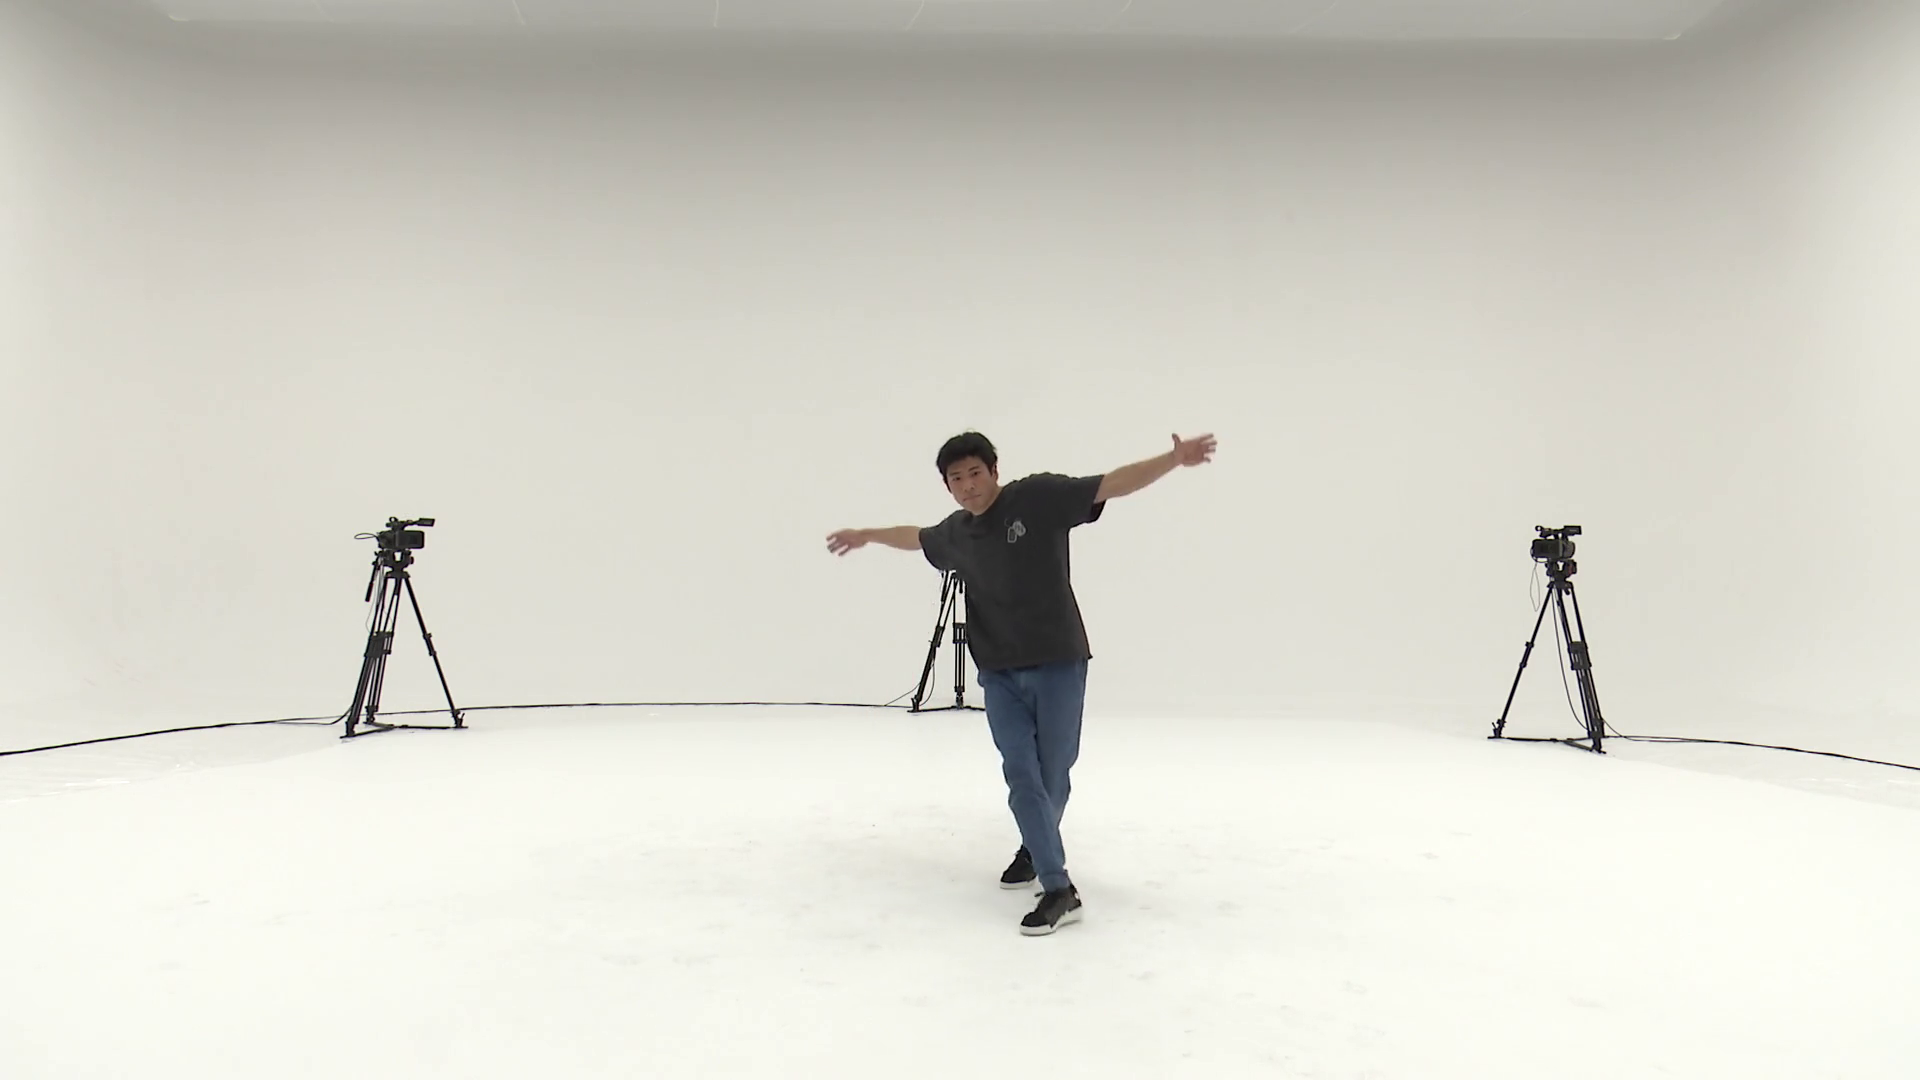

Displaying Frame 72


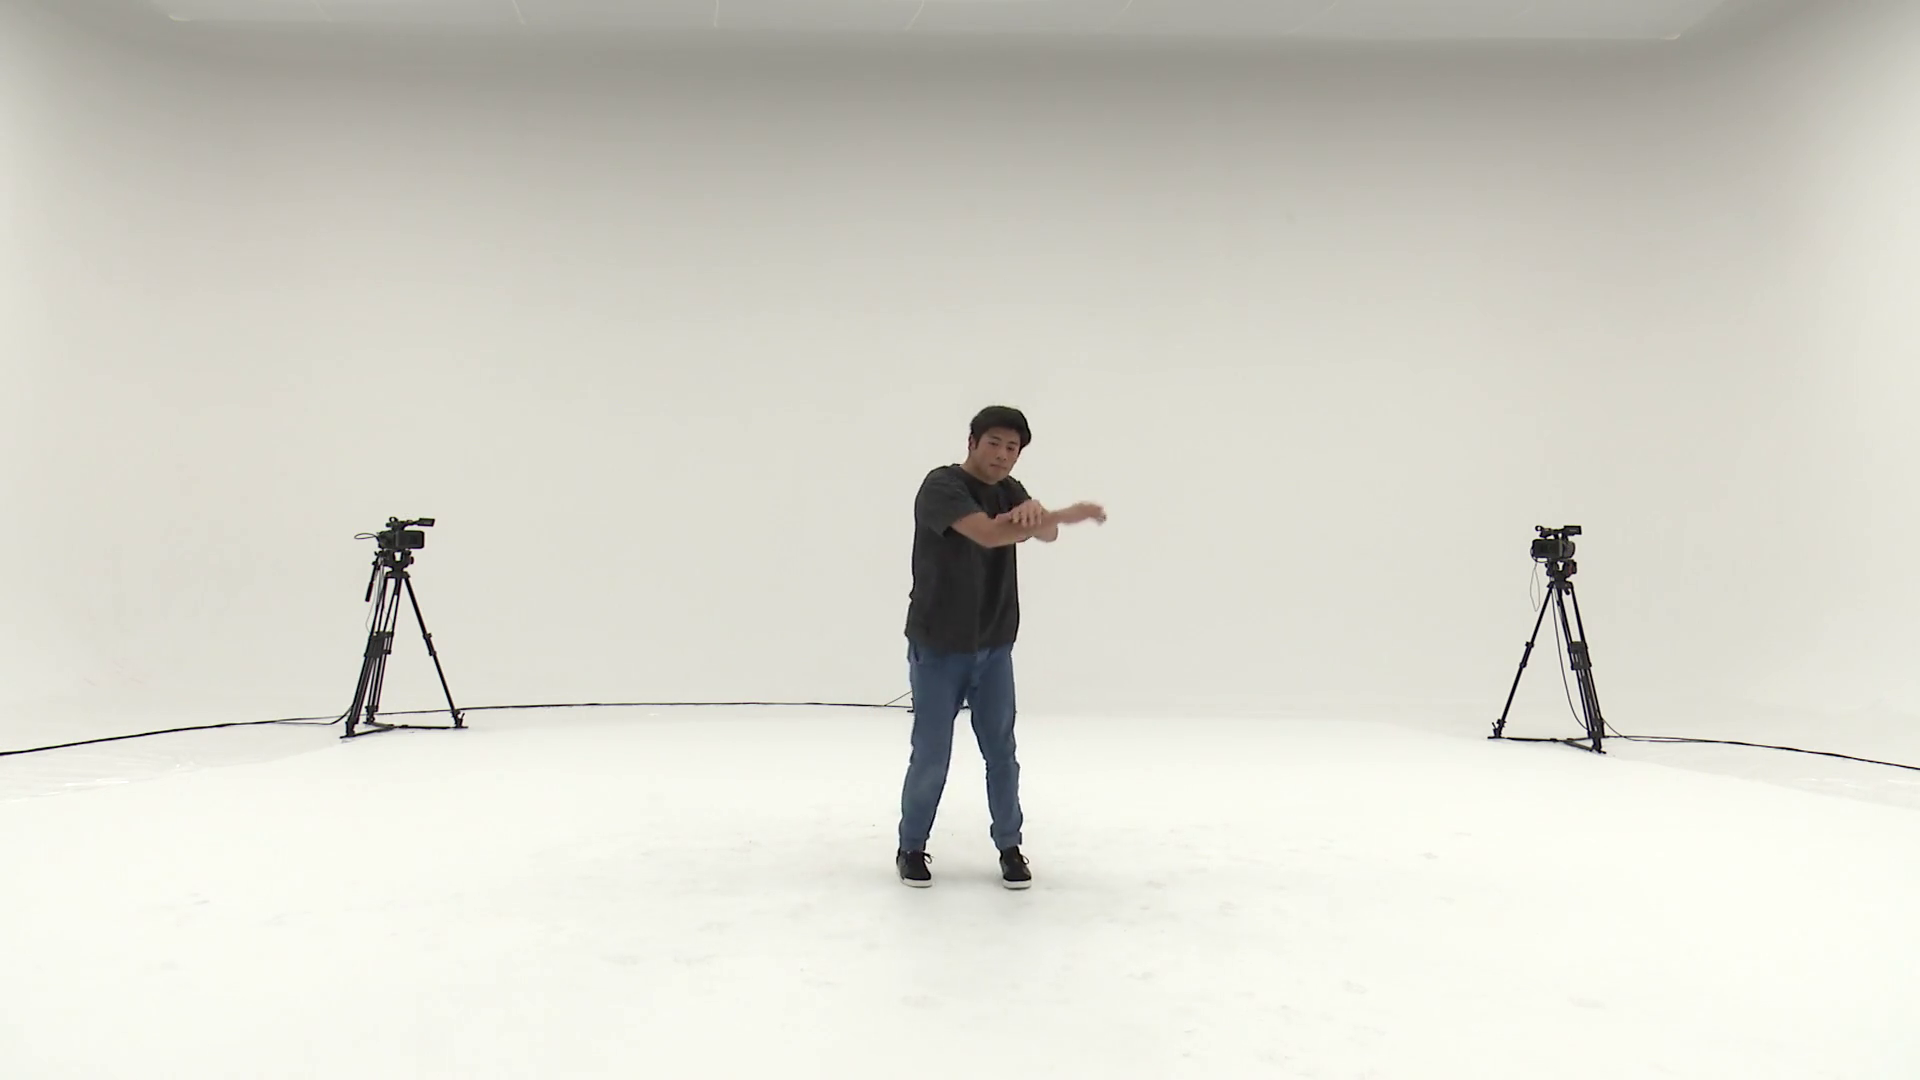

Displaying Frame 80


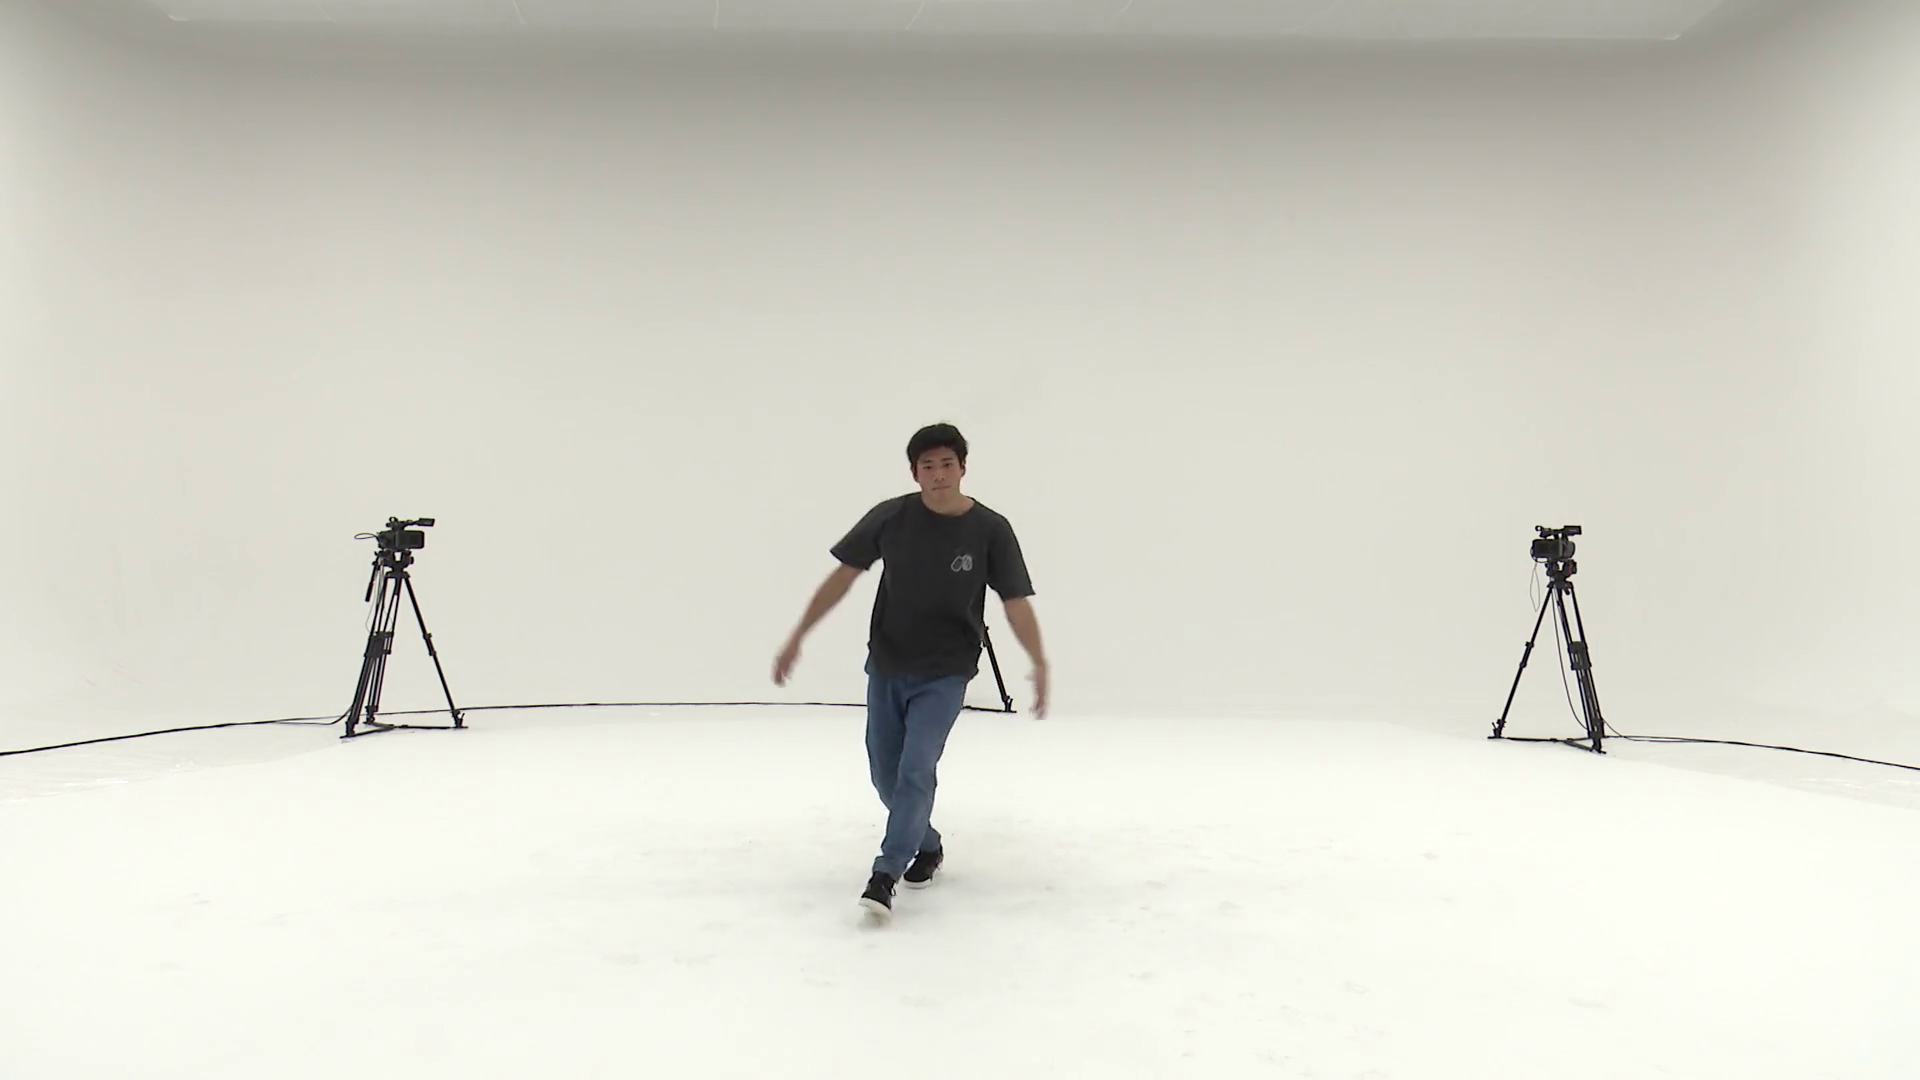

Displaying Frame 88


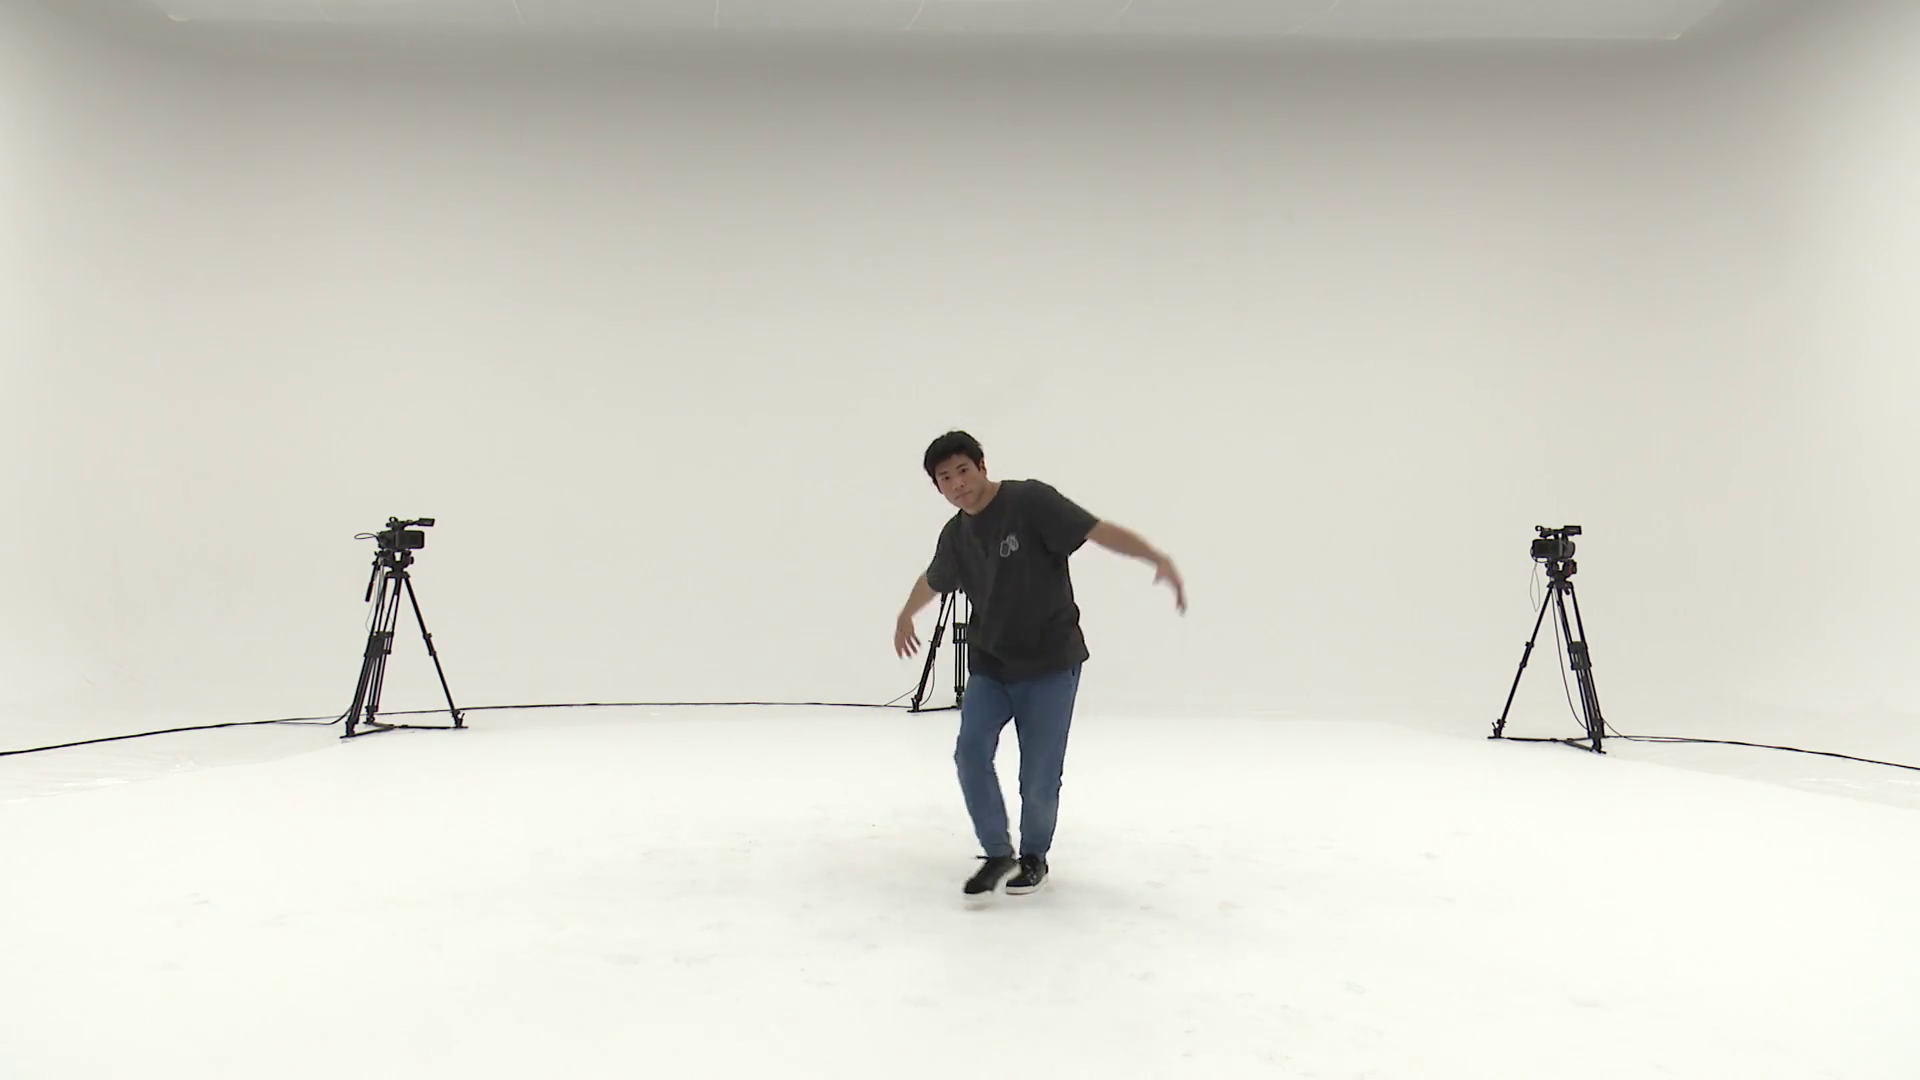

Displaying Frame 96


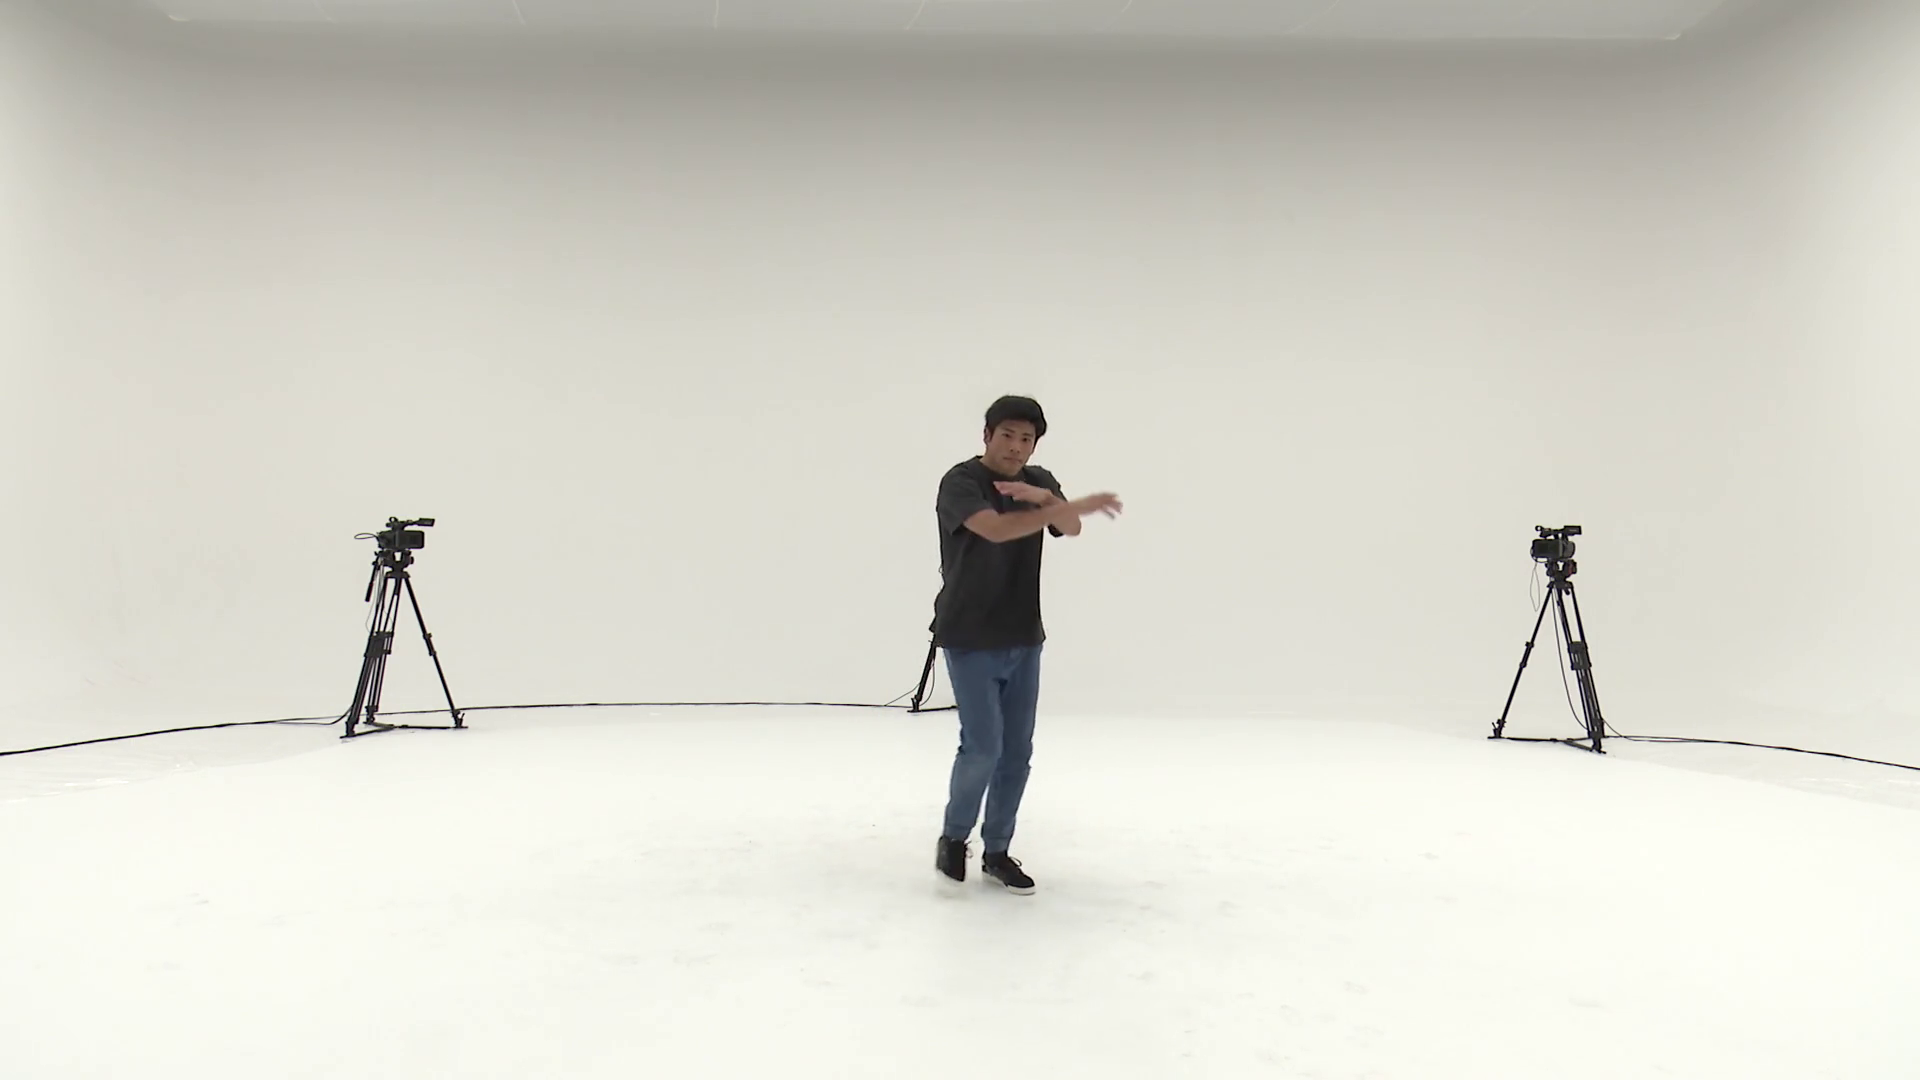

Extraction complete! Saved 100 frames to 'frames'.
Displayed 12 frames in Colab.


In [2]:
from google.colab import files
import cv2
import os
from google.colab.patches import cv2_imshow  # Colab-specific function for displaying images

# Step 1: Upload the video file to Colab
print("Upload your video file (e.g., video.mp4):")
uploaded = files.upload()

# Get the uploaded file name
video_filename = list(uploaded.keys())[0]
print(f"Uploaded file: {video_filename}")

# Function to extract frames from a video and display selected frames in Colab
def extract_frames(video_path, output_folder="frames", total_frames_to_extract=100, frames_to_display=12, display_frames=True):
    """
    Extracts frames from a video, saves them as images, and optionally displays selected frames in Colab.

    Args:
        video_path (str): Path to the video file.
        output_folder (str): Folder to save extracted frames. Defaults to "frames".
        total_frames_to_extract (int): Total number of frames to extract. Defaults to 100.
        frames_to_display (int): Number of frames to display in Colab. Defaults to 12.
        display_frames (bool): Whether to display frames in Colab. Defaults to True.
    """
    # Check if the video file exists
    if not os.path.exists(video_path):
        print(f"Error: Video file '{video_path}' not found.")
        return

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file '{video_path}'.")
        return

    # Get video properties
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = total_frames / fps
    print(f"Video Properties: {total_frames} frames, {fps:.2f} FPS, {duration:.2f} seconds")

    # Calculate frame interval to extract total_frames_to_extract frames
    frame_interval = max(1, total_frames // total_frames_to_extract)
    print(f"Extracting 1 frame every {frame_interval} frames to get {total_frames_to_extract} frames.")

    # Calculate frame interval to display frames_to_display frames
    display_interval = max(1, total_frames_to_extract // frames_to_display)
    print(f"Displaying 1 frame every {display_interval} extracted frames to show {frames_to_display} frames.")

    frame_count = 0
    saved_count = 0
    displayed_count = 0

    while cap.isOpened() and saved_count < total_frames_to_extract:
        ret, frame = cap.read()
        if not ret:
            break  # Exit if no more frames

        # Save every 'frame_interval' frame
        if frame_count % frame_interval == 0:
            frame_filename = os.path.join(output_folder, f"frame_{saved_count:04d}.jpg")
            cv2.imwrite(frame_filename, frame)
            saved_count += 1

            # Display every 'display_interval' frame in Colab
            if display_frames and saved_count % display_interval == 0:
                print(f"Displaying Frame {saved_count}")
                cv2_imshow(frame)  # Use Colab's custom function to display the frame
                displayed_count += 1

        frame_count += 1

    cap.release()
    print(f"Extraction complete! Saved {saved_count} frames to '{output_folder}'.")
    print(f"Displayed {displayed_count} frames in Colab.")

# Step 2: Extract 100 frames and display 12 of them in Colab
extract_frames(video_filename, total_frames_to_extract=100, frames_to_display=12, display_frames=True)

#Step 2.1: Apply Pose Estimation on Frames
*   Load extracted frames from the frames/ folder.
*   Use MediaPipe Pose to detect body keypoints.
*   Overlay keypoints on images and save them for verification.





In [3]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 24.3 MB/s eta 0:00:00


Processing 100 frames...
Displaying processed frame: frame_0000.jpg


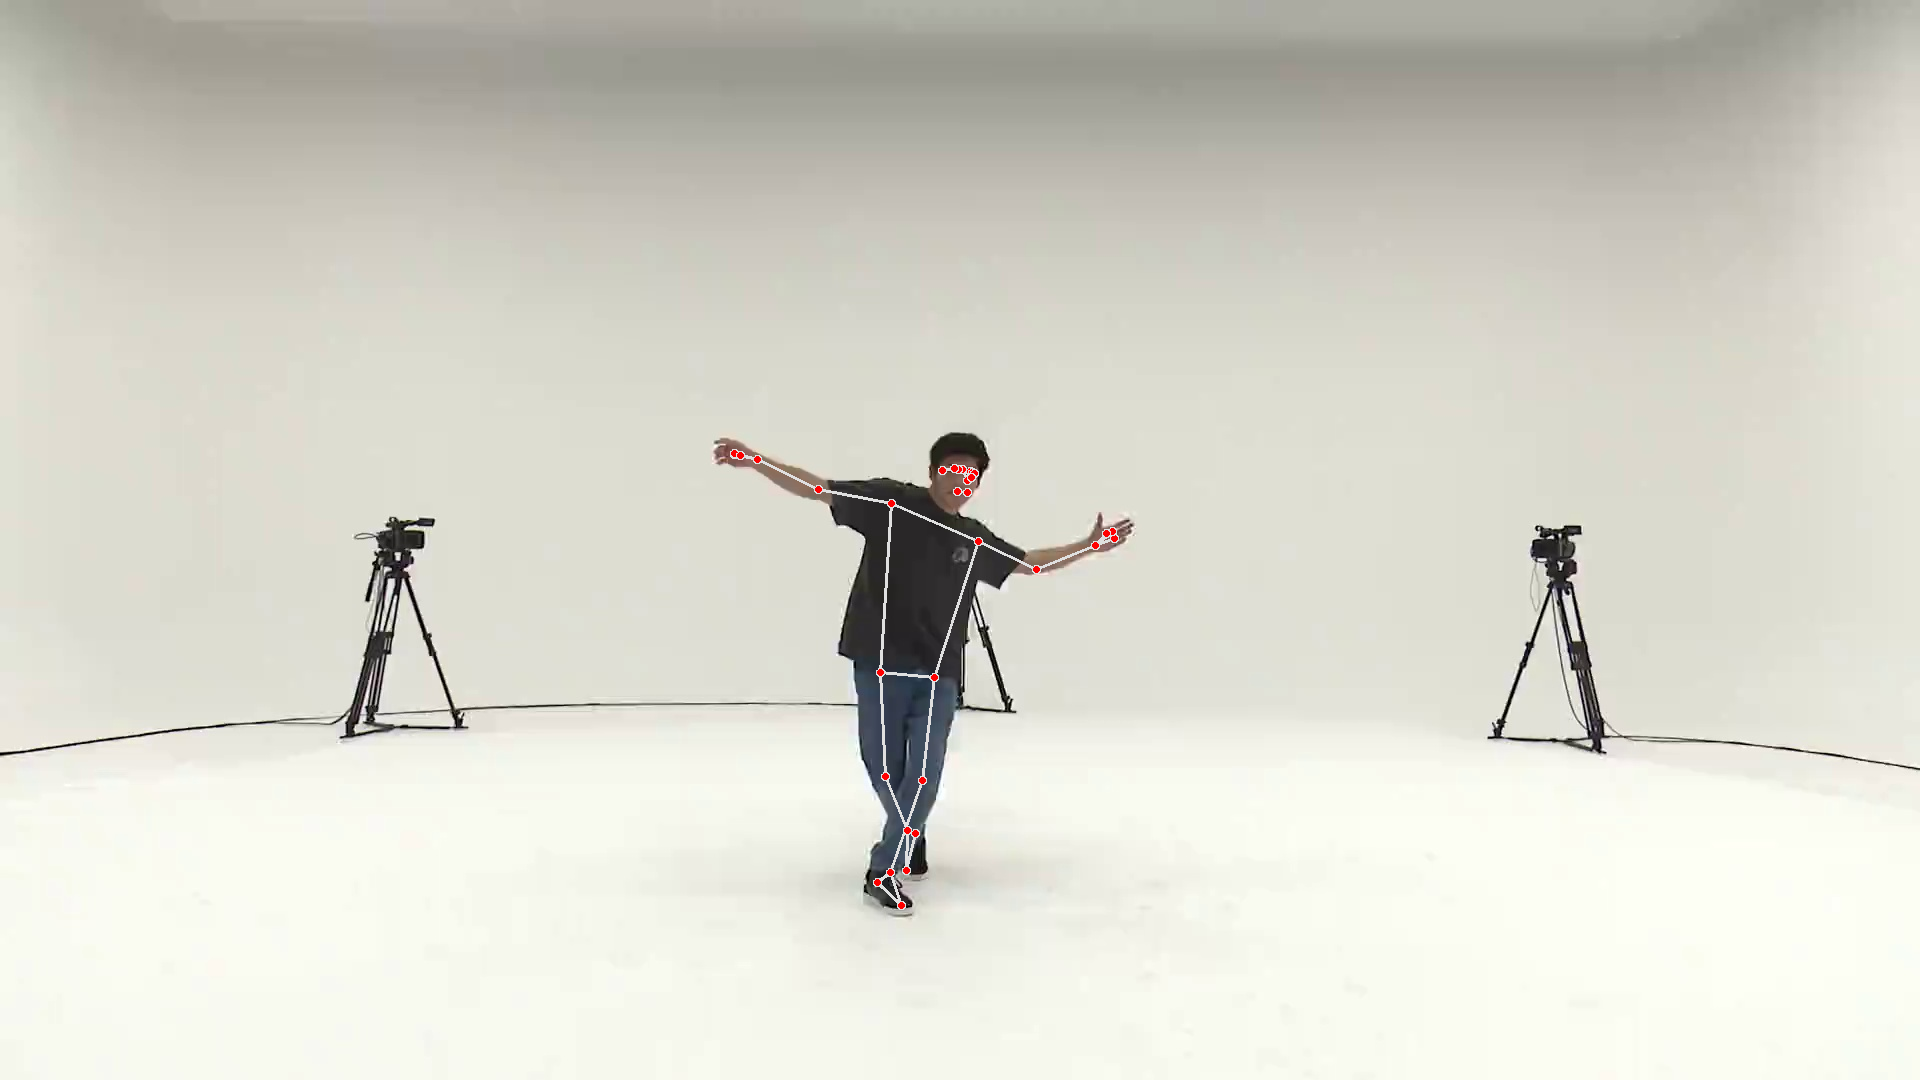

Displaying processed frame: frame_0001.jpg


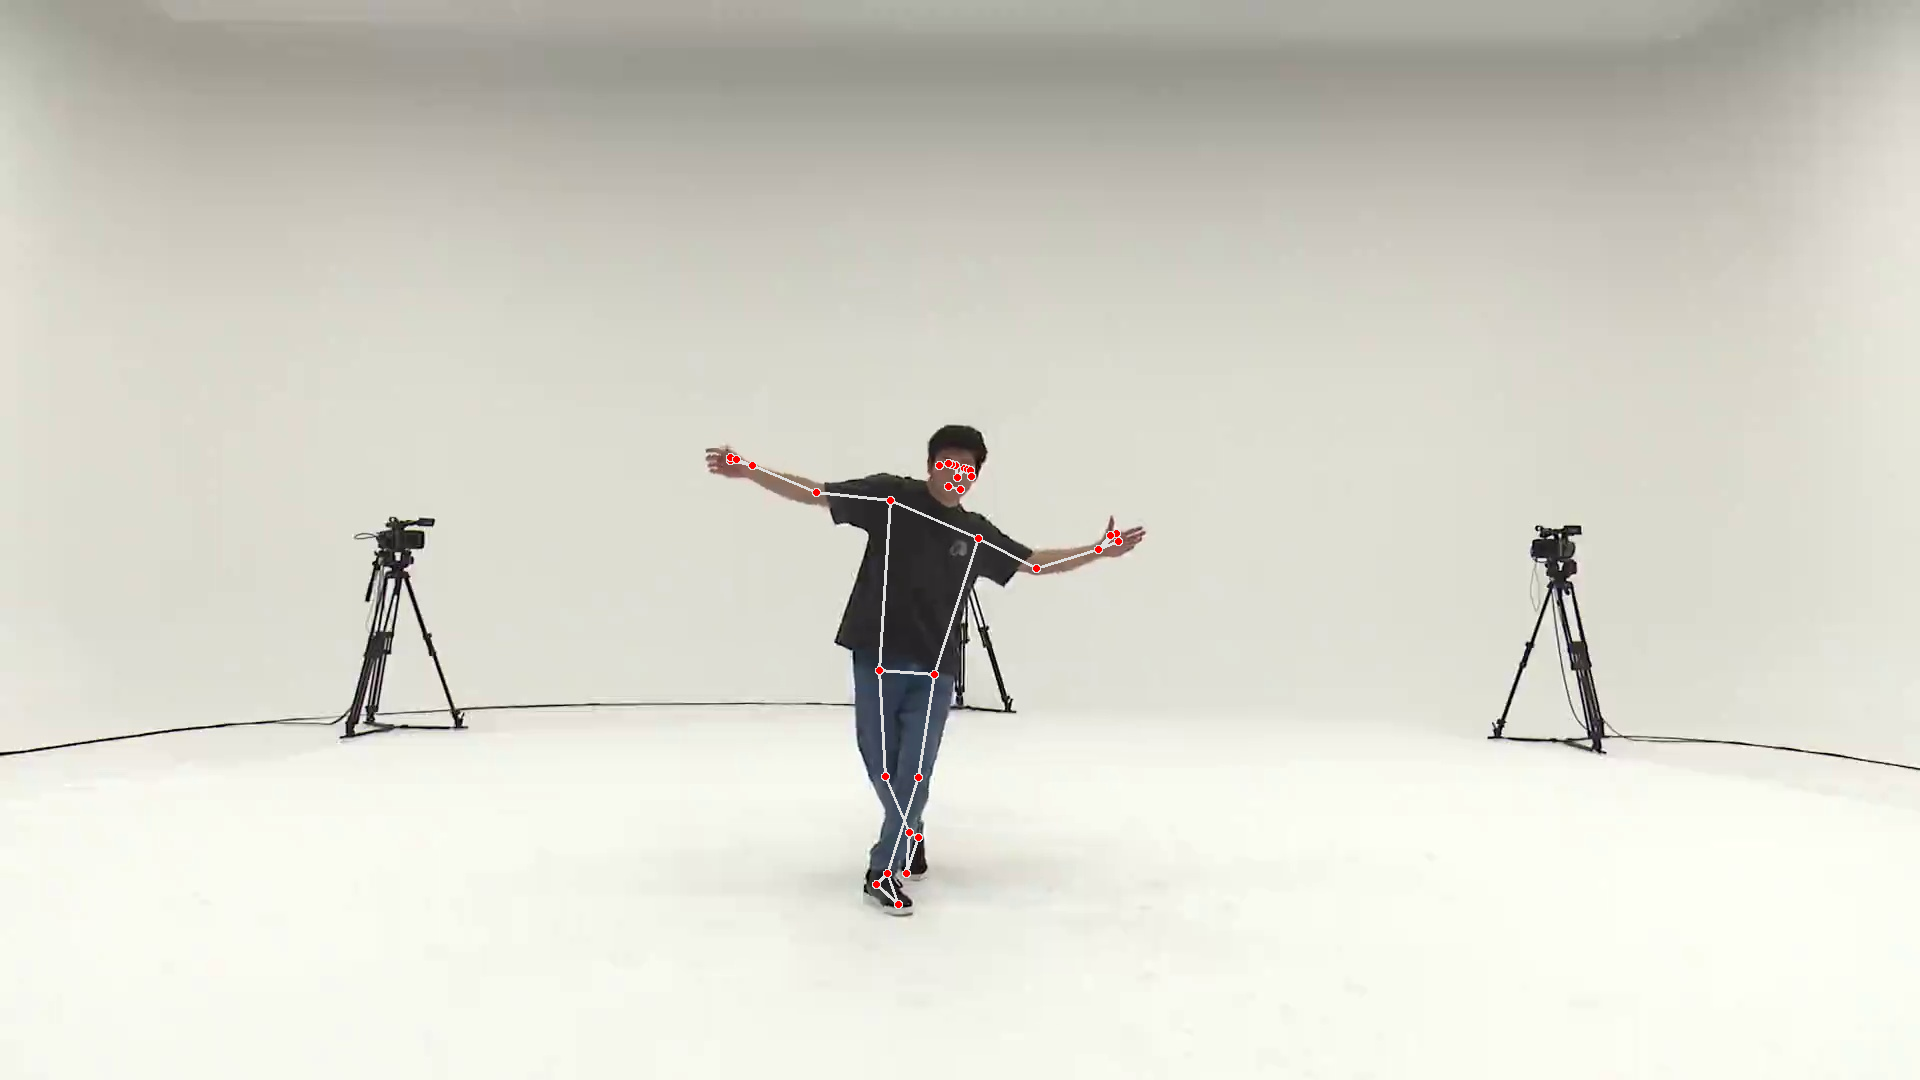

Processed frames saved in 'pose_frames'.


In [4]:
import mediapipe as mp
import cv2
import os
from google.colab.patches import cv2_imshow  # Colab-specific function for displaying images

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# Function to process frames and apply pose estimation
def process_frames(input_folder="frames", output_folder="pose_frames", display_samples=3):
    """
    Processes frames from the input folder, applies pose estimation, and saves annotated frames.

    Args:
        input_folder (str): Folder containing input frames. Defaults to "frames".
        output_folder (str): Folder to save processed frames. Defaults to "pose_frames".
        display_samples (int): Number of processed frames to display in Colab. Defaults to 3.
    """
    # Check if the input folder exists
    if not os.path.exists(input_folder):
        print(f"Error: Input folder '{input_folder}' not found.")
        return

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get list of frame files
    frame_files = sorted(os.listdir(input_folder))  # Ensure correct order
    if not frame_files:
        print(f"Error: No frames found in '{input_folder}'.")
        return

    print(f"Processing {len(frame_files)} frames...")

    for i, frame_file in enumerate(frame_files):
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)

        if frame is None:
            print(f"Warning: Could not read frame '{frame_file}'. Skipping.")
            continue

        # Convert image to RGB
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        # Draw pose landmarks
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Save processed frame
        output_path = os.path.join(output_folder, frame_file)
        cv2.imwrite(output_path, frame)

        # Display sample frames in Colab
        if display_samples > 0 and i < display_samples:
            print(f"Displaying processed frame: {frame_file}")
            cv2_imshow(frame)  # Use Colab's custom function to display the frame
            display_samples -= 1

    print(f"Processed frames saved in '{output_folder}'.")

# Apply pose estimation on extracted frames
process_frames(display_samples=3)  # Display 3 sample frames in Colab

#Step 2.2: Extract and Save Keypoints Data
*   Extract (x, y) coordinates and visibility for each keypoint.
*   Store them in a structured CSV file (pose_keypoints.csv).



In [5]:
import pandas as pd
import cv2
import os

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Function to extract and save keypoints from processed frames
def extract_keypoints(input_folder="frames", output_csv="pose_keypoints.csv"):
    """
    Extracts pose keypoints from frames and saves them to a CSV file.

    Args:
        input_folder (str): Folder containing input frames. Defaults to "frames".
        output_csv (str): Path to save the CSV file. Defaults to "pose_keypoints.csv".
    """
    # Check if the input folder exists
    if not os.path.exists(input_folder):
        print(f"Error: Input folder '{input_folder}' not found.")
        return

    # Get list of frame files
    frame_files = sorted(os.listdir(input_folder))  # Ensure correct order
    if not frame_files:
        print(f"Error: No frames found in '{input_folder}'.")
        return

    print(f"Extracting keypoints from {len(frame_files)} frames...")

    keypoints_data = []
    for i, frame_file in enumerate(frame_files):
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)

        if frame is None:
            print(f"Warning: Could not read frame '{frame_file}'. Skipping.")
            continue

        # Convert image to RGB
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        # Extract keypoints
        if results.pose_landmarks:
            frame_keypoints = []
            for lm in results.pose_landmarks.landmark:
                frame_keypoints.extend([lm.x, lm.y, lm.visibility])
            keypoints_data.append(frame_keypoints)

        # Display progress
        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1} frames...")

    # Save keypoints to CSV
    column_names = []
    for i in range(33):  # 33 keypoints
        column_names.extend([f"kp_{i}_x", f"kp_{i}_y", f"kp_{i}_visibility"])

    df = pd.DataFrame(keypoints_data, columns=column_names)
    df.to_csv(output_csv, index=False)
    print(f"Keypoints saved to {output_csv}")

# Extract keypoints and save to CSV
extract_keypoints()

Extracting keypoints from 100 frames...
Processed 10 frames...
Processed 20 frames...
Processed 30 frames...
Processed 40 frames...
Processed 50 frames...
Processed 60 frames...
Processed 70 frames...
Processed 80 frames...
Processed 90 frames...
Processed 100 frames...
Keypoints saved to pose_keypoints.csv


#Step 3.1: Compute Velocity of Keypoints
*   Calculate movement speed of each keypoint between frames.
*   Store velocity values in velocity_data.csv.




Calculating velocity for 100 frames...
Processed 10 frames...
Processed 20 frames...
Processed 30 frames...
Processed 40 frames...
Processed 50 frames...
Processed 60 frames...
Processed 70 frames...
Processed 80 frames...
Processed 90 frames...
Processed 100 frames...
Velocity data saved to velocity_data.csv
First 20 rows of velocity data:
    vel_kp_0  vel_kp_1  vel_kp_2  vel_kp_3  vel_kp_4  vel_kp_5  vel_kp_6  \
0   0.169230  0.118862  0.104614  0.090041  0.159310  0.164928  0.173043   
1   0.285266  0.271510  0.262958  0.262504  0.277490  0.263352  0.250761   
2   0.255487  0.291869  0.290192  0.277508  0.265007  0.258259  0.255938   
3   0.248562  0.274104  0.298161  0.320340  0.241812  0.233952  0.219853   
4   0.153971  0.192637  0.199051  0.213253  0.154264  0.140524  0.124252   
5   0.051125  0.073323  0.094631  0.120235  0.066134  0.067741  0.069986   
6   0.077990  0.060746  0.062399  0.069711  0.082678  0.083221  0.082258   
7   0.124956  0.134301  0.139051  0.141677  0.129

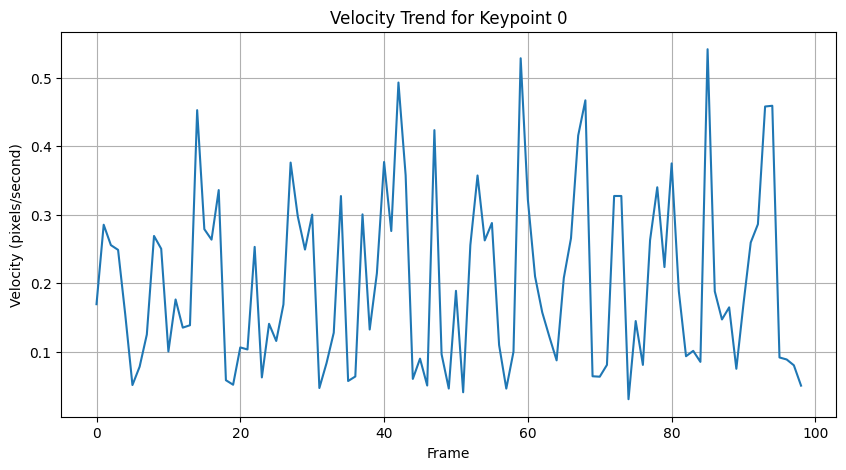

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate velocity of keypoints and display results
def calculate_velocity(input_csv="pose_keypoints.csv", output_csv="velocity_data.csv", fps=30, plot_sample_kp=0):
    """
    Calculates the velocity of keypoints between consecutive frames and saves the results to a CSV file.

    Args:
        input_csv (str): Path to the input CSV file containing keypoints. Defaults to "pose_keypoints.csv".
        output_csv (str): Path to save the velocity data. Defaults to "velocity_data.csv".
        fps (int): Frames per second of the video. Defaults to 30.
        plot_sample_kp (int): Index of a keypoint to plot velocity trends. Set to -1 to disable plotting.
    """
    # Check if the input CSV file exists
    if not os.path.exists(input_csv):
        print(f"Error: Input CSV file '{input_csv}' not found.")
        return

    # Load keypoints data
    try:
        df = pd.read_csv(input_csv)
    except Exception as e:
        print(f"Error: Could not read CSV file '{input_csv}'. {e}")
        return

    # Check if the CSV file has the expected structure
    if len(df.columns) != 99:  # 33 keypoints × 3 values (x, y, visibility)
        print(f"Error: CSV file '{input_csv}' does not contain the expected number of columns (99).")
        return

    print(f"Calculating velocity for {len(df)} frames...")

    velocities = []
    for i in range(1, len(df)):  # Skip first frame (no previous frame to compare)
        frame_velocity = []
        for j in range(0, len(df.columns), 3):  # Loop through (x, y) pairs
            x1, y1 = df.iloc[i-1, j:j+2]  # Previous frame
            x2, y2 = df.iloc[i, j:j+2]    # Current frame
            velocity = np.sqrt((x2 - x1)**2 + (y2 - y1)**2) * fps  # Euclidean distance * FPS
            frame_velocity.append(velocity)
        velocities.append(frame_velocity)

        # Display progress
        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1} frames...")

    # Save to CSV
    velocity_columns = [f"vel_kp_{i}" for i in range(33)]
    df_velocity = pd.DataFrame(velocities, columns=velocity_columns)
    df_velocity.to_csv(output_csv, index=False)

    # Display results
    print(f"Velocity data saved to {output_csv}")
    print("First 20 rows of velocity data:")
    print(df_velocity.head(20))  # Show first 20 rows

    # Plot velocity trends for a sample keypoint
    if plot_sample_kp >= 0 and plot_sample_kp < 33:
        plt.figure(figsize=(10, 5))
        plt.plot(df_velocity[f"vel_kp_{plot_sample_kp}"])
        plt.title(f"Velocity Trend for Keypoint {plot_sample_kp}")
        plt.xlabel("Frame")
        plt.ylabel("Velocity (pixels/second)")
        plt.grid()
        plt.show()
    else:
        print("Skipping velocity plot. Set `plot_sample_kp` to a valid keypoint index (0-32) to enable plotting.")

# Compute velocity and display results
calculate_velocity(plot_sample_kp=0)  # Plot velocity trends for keypoint 0

#Step 3.2: Compute and Save Joint Angles
*   Calculate joint angles using three keypoints (e.g., knee, elbow, hip).
*   Display results in Colab before saving to joint_angles.csv





Calculating joint angles for 100 frames...
Processed 10 frames...
Processed 20 frames...
Processed 30 frames...
Processed 40 frames...
Processed 50 frames...
Processed 60 frames...
Processed 70 frames...
Processed 80 frames...
Processed 90 frames...
Processed 100 frames...
Joint angles saved to joint_angles.csv
First 20 rows of joint angles:
    left_knee_angle  right_knee_angle
0         98.072979          0.159694
1         91.152149          0.194117
2        105.832150          0.122450
3        130.715580          0.010227
4        149.276138          0.120385
5        136.784904          0.211841
6         98.974801          0.248456
7         81.742230          0.250042
8        168.883922          0.101763
9        129.523674          0.230540
10       161.975488          0.273825
11       161.969600          0.231602
12       157.637952          0.220275
13       146.195258          0.217958
14       133.561922          0.115481
15       113.370118          0.005014
16       1

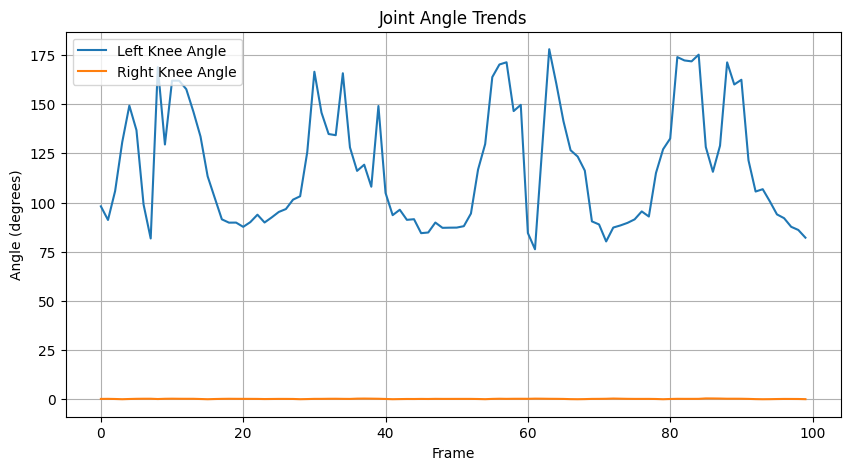

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute joint angles
def calculate_joint_angles(input_csv="pose_keypoints.csv", output_csv="joint_angles.csv", plot_angles=True):
    """
    Calculates joint angles (e.g., knee angles) from keypoints and saves the results to a CSV file.

    Args:
        input_csv (str): Path to the input CSV file containing keypoints. Defaults to "pose_keypoints.csv".
        output_csv (str): Path to save the joint angles. Defaults to "joint_angles.csv".
        plot_angles (bool): Whether to plot joint angle trends. Defaults to True.
    """
    # Check if the input CSV file exists
    if not os.path.exists(input_csv):
        print(f"Error: Input CSV file '{input_csv}' not found.")
        return

    # Load keypoints data
    try:
        df = pd.read_csv(input_csv)
    except Exception as e:
        print(f"Error: Could not read CSV file '{input_csv}'. {e}")
        return

    # Check if the CSV file has the expected structure
    if len(df.columns) != 99:  # 33 keypoints × 3 values (x, y, visibility)
        print(f"Error: CSV file '{input_csv}' does not contain the expected number of columns (99).")
        return

    print(f"Calculating joint angles for {len(df)} frames...")

    def angle_between_points(a, b, c):
        """Calculate angle at point b (in degrees) using three keypoints a, b, c."""
        ba = np.array(a) - np.array(b)
        bc = np.array(c) - np.array(b)
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
        return np.degrees(angle)

    joint_angles = []
    for i in range(len(df)):
        angles = []
        # Extract relevant keypoints (hip, knee, ankle)
        left_hip = df.iloc[i, 12:14].values  # Keypoint 12: Left hip (x, y)
        left_knee = df.iloc[i, 24:26].values  # Keypoint 24: Left knee (x, y)
        left_ankle = df.iloc[i, 28:30].values  # Keypoint 28: Left ankle (x, y)
        right_hip = df.iloc[i, 11:13].values  # Keypoint 11: Right hip (x, y)
        right_knee = df.iloc[i, 25:27].values  # Keypoint 25: Right knee (x, y)
        right_ankle = df.iloc[i, 29:31].values  # Keypoint 29: Right ankle (x, y)

        # Calculate angles for left and right knee
        angles.append(angle_between_points(left_hip, left_knee, left_ankle))
        angles.append(angle_between_points(right_hip, right_knee, right_ankle))

        joint_angles.append(angles)

        # Display progress
        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1} frames...")

    # Save to CSV
    angle_columns = ["left_knee_angle", "right_knee_angle"]
    df_angles = pd.DataFrame(joint_angles, columns=angle_columns)
    df_angles.to_csv(output_csv, index=False)

    # Display results
    print(f"Joint angles saved to {output_csv}")
    print("First 20 rows of joint angles:")
    print(df_angles.head(20))  # Show first 20 rows

    # Plot joint angle trends
    if plot_angles:
        plt.figure(figsize=(10, 5))
        plt.plot(df_angles["left_knee_angle"], label="Left Knee Angle")
        plt.plot(df_angles["right_knee_angle"], label="Right Knee Angle")
        plt.title("Joint Angle Trends")
        plt.xlabel("Frame")
        plt.ylabel("Angle (degrees)")
        plt.legend()
        plt.grid()
        plt.show()

# Compute joint angles and display results
calculate_joint_angles(plot_angles=True)  # Plot joint angle trends

#Step 4.1: Prepare Data for Model Training
*   Load the extracted features (pose_keypoints.csv, velocity_data.csv, joint_angles.csv).
*   Merge them into a single dataset for training.
*   Display the first few rows in Colab for verification

#Merge Feature Data and Prepare for Training

In [8]:
import pandas as pd
import numpy as np

# Step 1: Load the datasets
keypoints_df = pd.read_csv("pose_keypoints.csv")
velocity_df = pd.read_csv("velocity_data.csv")
angles_df = pd.read_csv("joint_angles.csv")

# Step 2: Verify the number of rows in each dataset
print(f"Keypoints dataset: {len(keypoints_df)} rows")
print(f"Velocity dataset: {len(velocity_df)} rows")
print(f"Joint angles dataset: {len(angles_df)} rows")

# Step 3: Align the datasets (trim keypoints and joint angles to match velocity)
# Velocity has one less row because it's calculated between consecutive frames
keypoints_df = keypoints_df.iloc[1:]  # Remove the first row
angles_df = angles_df.iloc[1:]  # Remove the first row

# Verify the number of rows after trimming
print("\nAfter trimming:")
print(f"Keypoints dataset: {len(keypoints_df)} rows")
print(f"Velocity dataset: {len(velocity_df)} rows")
print(f"Joint angles dataset: {len(angles_df)} rows")

# Step 4: Merge the datasets
merged_df = pd.concat([keypoints_df, velocity_df, angles_df], axis=1)

# Step 5: Save the merged dataset
output_csv = "training_data.csv"
merged_df.to_csv(output_csv, index=False)

# Step 6: Display results
print(f"\nMerged training data saved to {output_csv}")
print("First 20 rows of the dataset:")
print(merged_df.head(20))  # Show first 20 rows

Keypoints dataset: 100 rows
Velocity dataset: 99 rows
Joint angles dataset: 100 rows

After trimming:
Keypoints dataset: 99 rows
Velocity dataset: 99 rows
Joint angles dataset: 99 rows

Merged training data saved to training_data.csv
First 20 rows of the dataset:
      kp_0_x    kp_0_y  kp_0_visibility    kp_1_x    kp_1_y  kp_1_visibility  \
1   0.498816  0.441924         0.999962  0.502488  0.434170         0.999831   
2   0.490032  0.438281         0.999965  0.494389  0.430132         0.999843   
3   0.481525  0.438679         0.999964  0.484660  0.430182         0.999841   
4   0.473745  0.435831         0.999959  0.476121  0.426930         0.999829   
5   0.470604  0.431772         0.999960  0.472319  0.421755         0.999839   
6   0.468930  0.432092         0.999864  0.470173  0.422925         0.999682   
7   0.471275  0.433215         0.999871  0.472179  0.423201         0.999706   
8   0.475263  0.434416         0.999855  0.476653  0.423359         0.999669   
9   0.481983  0.

#Step 4.2: Train a CNN-RNN Model
*   Load training_data.csv for model training.
*   Define a CNN-RNN architecture for movement classification.
*   Train the model and display accuracy.



NaNs in dataset: 134


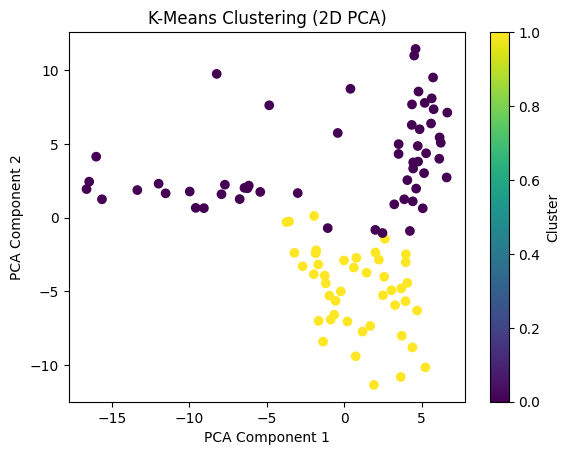

Epoch 1/50, Loss: 1.3617, Train Accuracy: 0.5875
Test Accuracy: 0.4500
New best model saved with accuracy: 0.4500
Epoch 2/50, Loss: 1.3534, Train Accuracy: 0.5875
Test Accuracy: 0.4500
Epoch 3/50, Loss: 1.3428, Train Accuracy: 0.5875
Test Accuracy: 0.4500
Epoch 4/50, Loss: 1.2995, Train Accuracy: 0.5875
Test Accuracy: 0.4500
Epoch 5/50, Loss: 1.3198, Train Accuracy: 0.5875
Test Accuracy: 0.4500
Epoch 6/50, Loss: 1.3447, Train Accuracy: 0.5875
Test Accuracy: 0.4500
Epoch 7/50, Loss: 1.3605, Train Accuracy: 0.5875
Test Accuracy: 0.4500
Epoch 8/50, Loss: 1.4181, Train Accuracy: 0.5875
Test Accuracy: 0.4500
Epoch 9/50, Loss: 1.2942, Train Accuracy: 0.5875
Test Accuracy: 0.4500
Epoch 10/50, Loss: 1.3739, Train Accuracy: 0.5875
Test Accuracy: 0.4500
Epoch 11/50, Loss: 1.3120, Train Accuracy: 0.5875
Test Accuracy: 0.4500
No improvement for 10 epochs. Stopping training.
Final Test Accuracy: 0.4500


In [9]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from torch.utils.data import DataLoader, TensorDataset
from sklearn.impute import SimpleImputer
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Load and preprocess the dataset
# Load dataset
df = pd.read_csv("training_data.csv")

# Check for missing values
print("NaNs in dataset:", df.isnull().sum().sum())

# Split data into features
X = df.values

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
X = imputer.fit_transform(X)  # Impute missing values in X

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Generate synthetic labels using K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Assume 2 classes
y = kmeans.fit_predict(X)  # Generate labels

# Visualize the clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("K-Means Clustering (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Add channel dimension for CNN input
X_train_tensor = X_train_tensor.unsqueeze(1)  # Shape: (batch_size, channels, sequence_length)
X_test_tensor = X_test_tensor.unsqueeze(1)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Increased batch size
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 2: Define the CNN-RNN Model
class MovementClassifier(nn.Module):
    def __init__(self):
        super(MovementClassifier, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )
        self.rnn = nn.LSTM(input_size=64, hidden_size=128, batch_first=True)
        self.fc = nn.Linear(128, 2)  # 2 classes (adjust based on synthetic labels)
        self.dropout = nn.Dropout(0.5)  # Add dropout for regularization

    def forward(self, x):
        x = self.cnn(x)
        x = x.permute(0, 2, 1)  # Reshape for RNN (batch, sequence, features)
        x, _ = self.rnn(x)
        x = x[:, -1, :]  # Take the last output
        x = self.dropout(x)  # Apply dropout
        x = self.fc(x)
        return x

# Step 3: Initialize model, loss function, and optimizer
model = MovementClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Increased learning rate
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5)  # Learning rate scheduler

# Step 4: Training loop with early stopping and model checkpointing
num_epochs = 50
best_accuracy = 0.0
patience = 10  # Early stopping patience
no_improvement = 0  # Counter for epochs without improvement

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    train_accuracy = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    # Evaluate on the test set
    model.eval()
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            test_correct += (predicted == y_batch).sum().item()
            test_total += y_batch.size(0)

    test_accuracy = test_correct / test_total
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Learning rate scheduling
    scheduler.step(test_accuracy)

    # Early stopping and model checkpointing
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), "best_movement_classifier.pth")
        print(f"New best model saved with accuracy: {best_accuracy:.4f}")
        no_improvement = 0
    else:
        no_improvement += 1
        if no_improvement >= patience:
            print(f"No improvement for {patience} epochs. Stopping training.")
            break

# Step 5: Load the best model and evaluate
model.load_state_dict(torch.load("best_movement_classifier.pth", weights_only=True))
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == y_batch).sum().item()
        test_total += y_batch.size(0)

test_accuracy = test_correct / test_total
print(f"Final Test Accuracy: {test_accuracy:.4f}")

#Step 5.1: Evaluate Model Performance
*   Load the trained model.
*   Evaluate it using accuracy, precision, recall, and F1-score.
*   Display a classification report for better insights.

###Confusion Matrix:

Compute a confusion matrix to understand the model’s performance for each class.

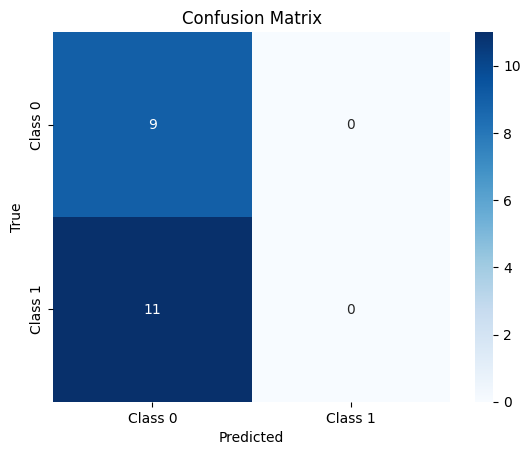

In [14]:
# Previous cell code defining the model

# ...

# Step 3: Initialize model, loss function, and optimizer
model = MovementClassifier() # make sure this is not overwritten
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Increased learning rate
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5)  # Learning rate scheduler

# ...

# Current cell code
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
y_true = []
y_pred = []

model.eval() # Now this should work
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.numpy())

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

###Classification Report:

Generate a classification report to see precision, recall, and F1-score for each class.

In [15]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1']))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.45      1.00      0.62         9
     Class 1       0.00      0.00      0.00        11

    accuracy                           0.45        20
   macro avg       0.23      0.50      0.31        20
weighted avg       0.20      0.45      0.28        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Save the Model:

Save the final model for deployment.

In [22]:
torch.save(model.state_dict(), "final_movement_classifier.pth")